In [1]:
import sympy as sp
from sympy import init_printing
import numpy as np
from IPython.display import display
from IPython.display import HTML
import pickle
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from pyomo.environ import*
from pyomo.opt import SolverFactory
from pyomo.opt import SolverStatus, TerminationCondition

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

init_printing(use_latex=True)

from plot_utils import *

In [2]:
g = sp.symbols("g")
l1, l2 = sp.symbols(["l1", "l2"])
m1, m2 = sp.symbols(["m1", "m2"])
# Our system is defined by the states th1, th2, dth1 and dth2
psi1, phi2 = sp.symbols(["\\psi_1", "\\phi_2"])
dpsi1, dphi2 = sp.symbols(["\\dot{\\psi_1}", "\\dot{\\phi_2}"])
ddpsi1, ddphi2 = sp.symbols(["\\ddot{\\psi_1}", "\\ddot{\\phi_2}"])
# Force input
tau = sp.symbols("\\tau")

In [3]:
q = sp.Matrix([psi1, phi2])
dq = sp.Matrix([dpsi1, dphi2])
ddq = sp.Matrix([ddpsi1, ddphi2])

In [4]:
#Amir
def rot_x(x):
    c = sp.cos(x)
    s = sp.sin(x)
    return sp.Matrix([
        [1, 0, 0],
        [0, c, s],
        [0, -s, c]
    ])

def rot_y(y):
    c = sp.cos(y)
    s = sp.sin(y)
    return sp.Matrix([
        [c, 0, -s],
        [0, 1, 0],
        [s, 0, c]
    ])

def rot_z(z):
    c = sp.cos(z)
    s = sp.sin(z)
    return sp.Matrix([
        [c, s, 0],
        [-s, c, 0],
        [0, 0, 1]
    ])

In [5]:
RI_1 = rot_z(psi1)
R1_I = RI_1.T

RI_2 = rot_x(phi2) @ RI_1
R2_I = RI_2.T

[x1, y1, z1] = R1_I @ sp.Matrix([l1, 0, 0])
[x2, y2, z2] = sp.Matrix([x1, y1, z1]) + R2_I @ sp.Matrix([0, 0, -l2])

In [6]:
with open("measurements_3d.pickle", "rb") as f:
    pts_arr = pickle.load(f)
    pts_arr = np.array(pts_arr)
with open("cam_params_3d.pickle", "rb") as f:
    [K_arr, R_arr, t_arr] = pickle.load(f)    
    K_arr = np.array(K_arr)
    R_arr = np.array(R_arr)
    t_arr = np.array(t_arr)
    
print(pts_arr.shape)
print("(cam, markers, N, xy)")

(2, 2, 400, 2)
(cam, markers, N, xy)


In [7]:
#ADD NOISE
pts_arr_noise = pts_arr + np.random.uniform(-50, 50, pts_arr.shape)

In [8]:
#OUTLIER REJECTING COST FUNCTION (REDESCENDING LOSS)
def func_step(start, x):
        return 1/(1+np.e**(-0.1*(x - start)))

def func_piece(start, end, x):
        return func_step(start, x) - func_step(end, x)
    
def redescending_loss(err, a, b, c):
    e = abs(err)
    cost = 0.0
    cost += (1 - func_step(a, e))/2*e**2
    cost += func_piece(a, b, e)*(a*e - (a**2)/2)
    cost += func_piece(b, c, e)*(a*b - (a**2)/2 + (a*(c-b)/2)*(1-((c-e)/(c-b))**2))
    cost += func_step(c, e)*(a*b - (a**2)/2 + (a*(c-b)/2))
    return cost

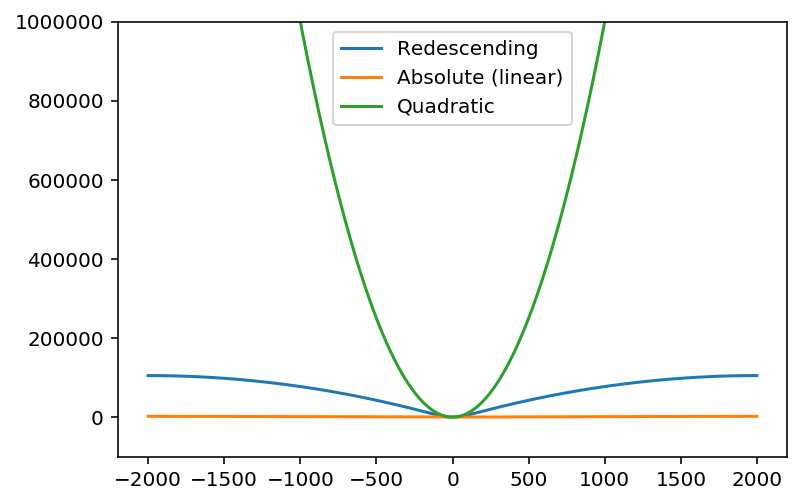

In [9]:
# PLOT OF REDESCENDING, ABSOLUTE AND QUADRATIC COST FUNCTIONS
# we use a redescending cost to stop outliers affecting the optimisation negatively

redesc_a = 100
redesc_b = 200
redesc_c = 2000

#Plot
r_x = np.arange(-2000,2000)
r_y1 = [redescending_loss(i, redesc_a, redesc_b, redesc_c) for i in r_x]
r_y2 = abs(r_x)
r_y3 = r_x**2
plt.plot(r_x,r_y1, label="Redescending")
plt.plot(r_x,r_y2, label="Absolute (linear)")
plt.plot(r_x,r_y3, label="Quadratic")
ax = plt.gca()
ax.set_ylim((-1e5, 1e6))
ax.legend()

In [10]:
l1_val = 1
l2_val = 1
m1_val = 1
m2_val = 1

h = 0.02
(C, L, N, _) = pts_arr.shape

In [11]:
# Just for plotting
with open("states_3d.pickle", "rb") as f:
    [th1_orig, th2_orig, dth1_orig, dth2_orig, ddth1_orig, ddth2_orig, _] = pickle.load(f)

Solving for range: 10
ok
optimal


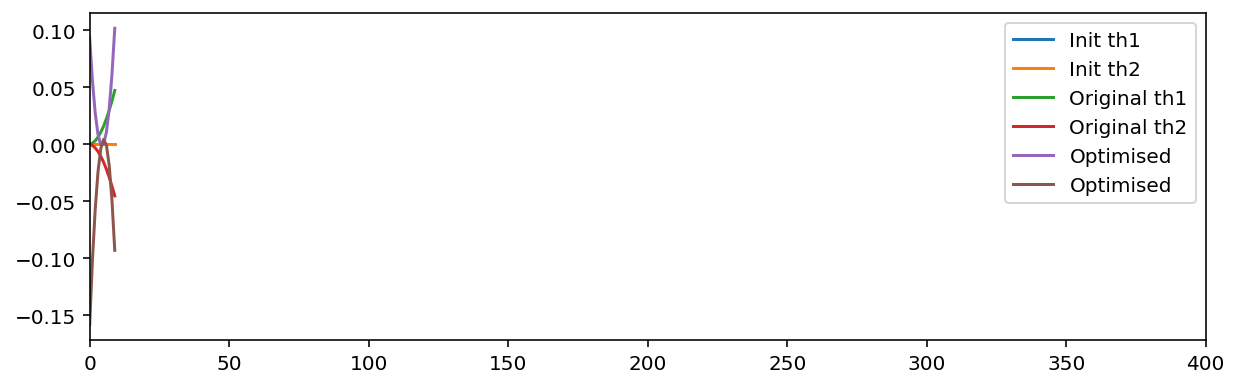

Solving for range: 20
ok
optimal


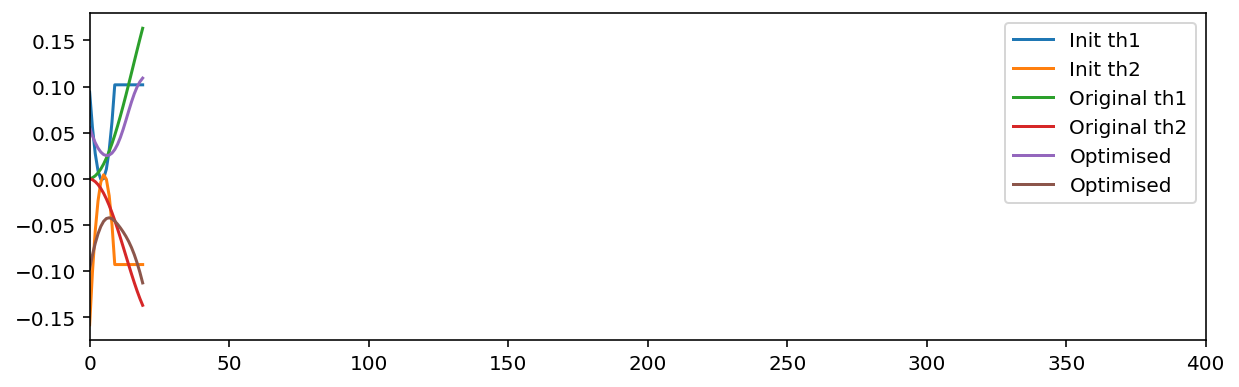

Solving for range: 30
ok
optimal


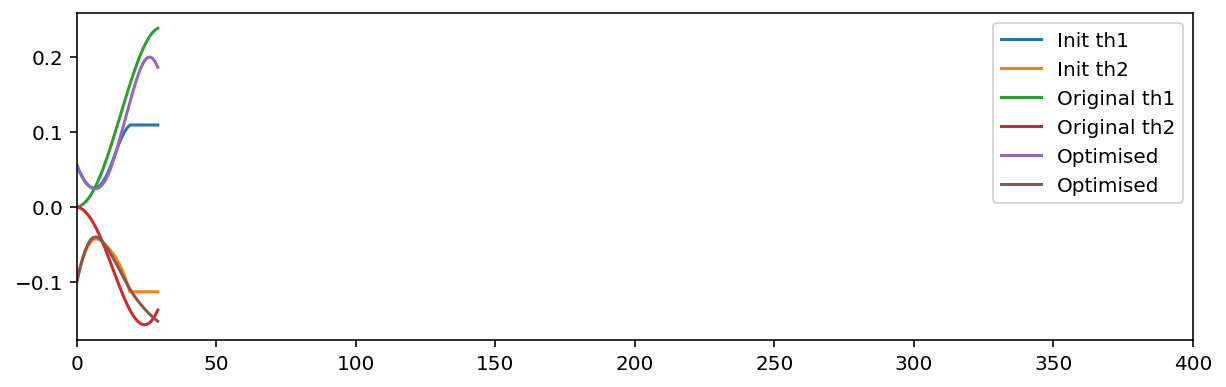

Solving for range: 40
ok
optimal


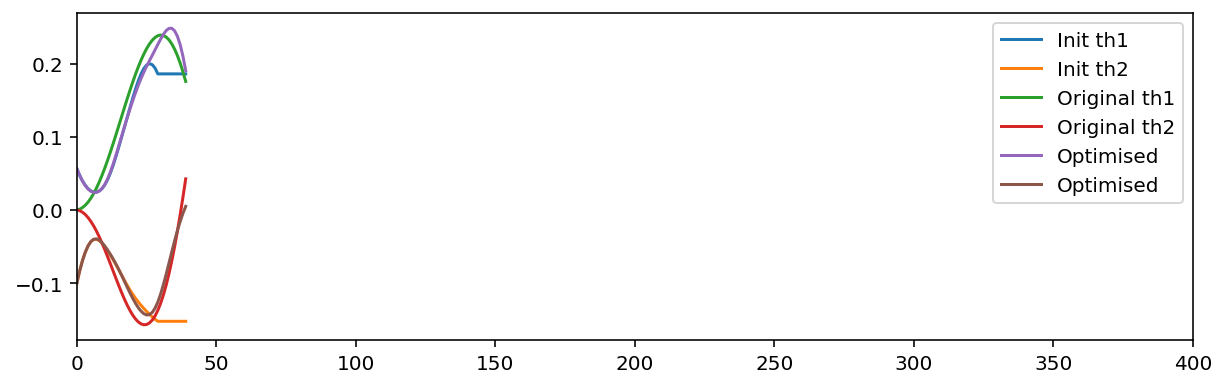

Solving for range: 50
ok
optimal


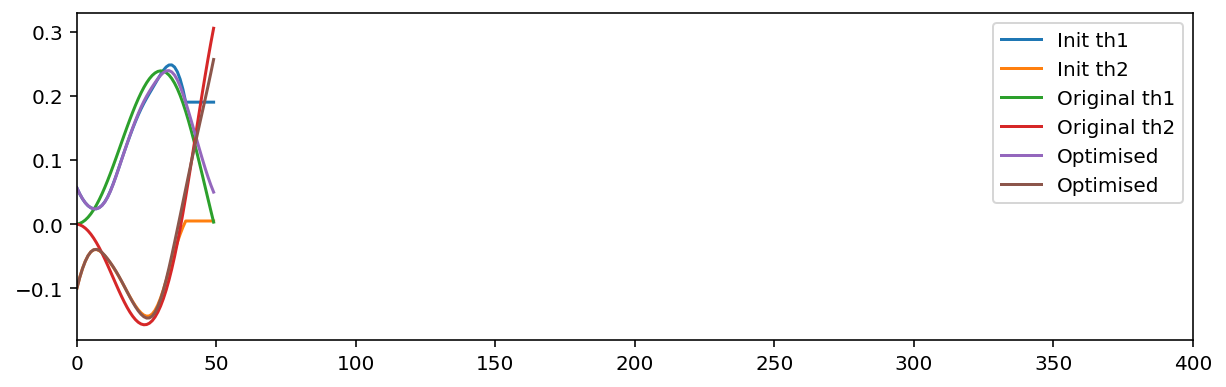

Solving for range: 60
ok
optimal


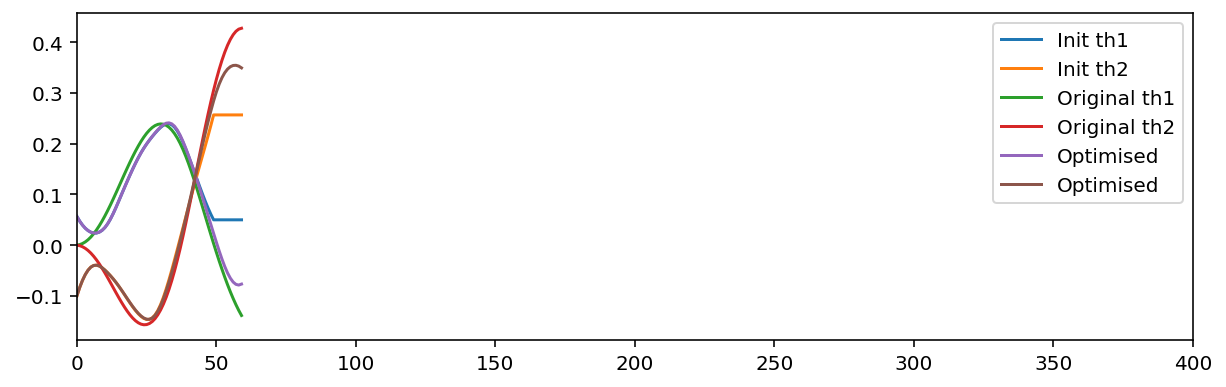

Solving for range: 70
ok
optimal


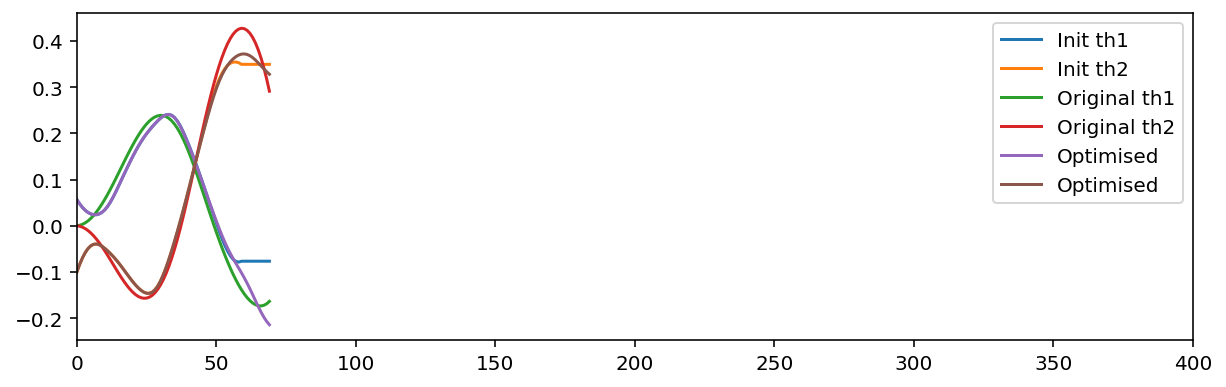

Solving for range: 80
ok
optimal


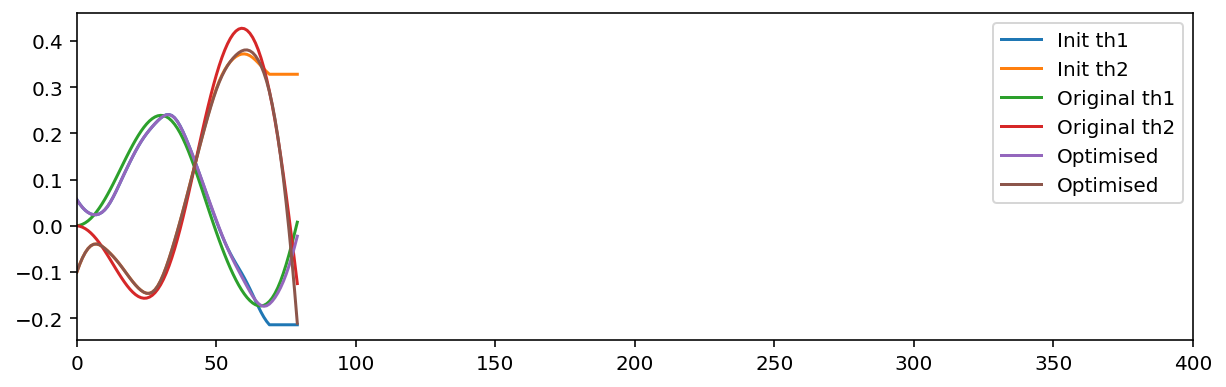

Solving for range: 90
ok
optimal


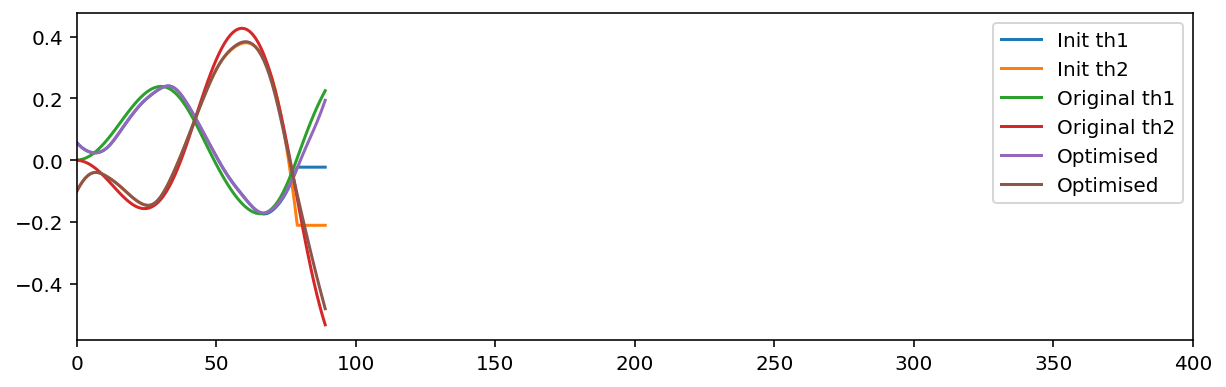

Solving for range: 100
ok
optimal


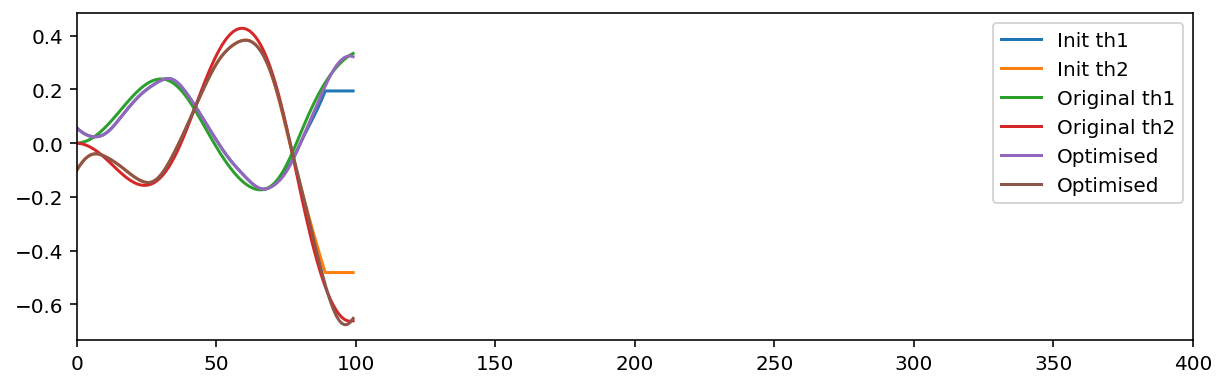

Solving for range: 110
ok
optimal


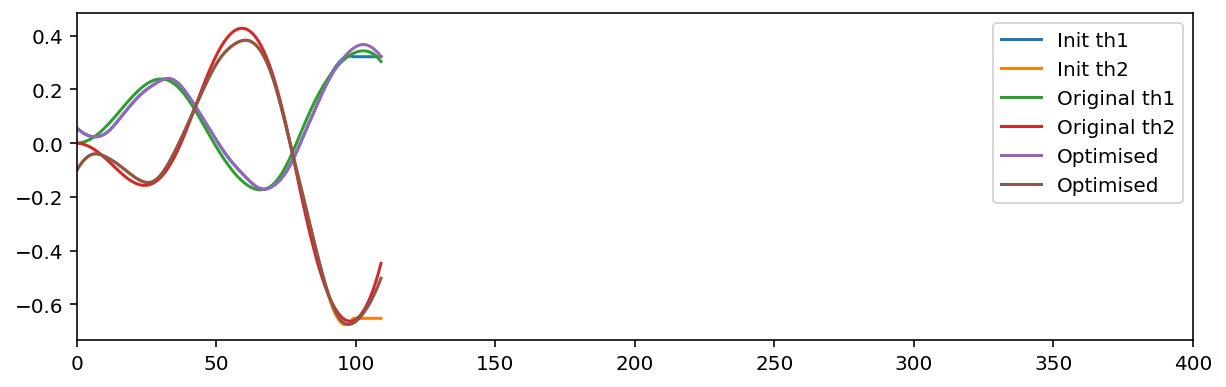

Solving for range: 120
ok
optimal


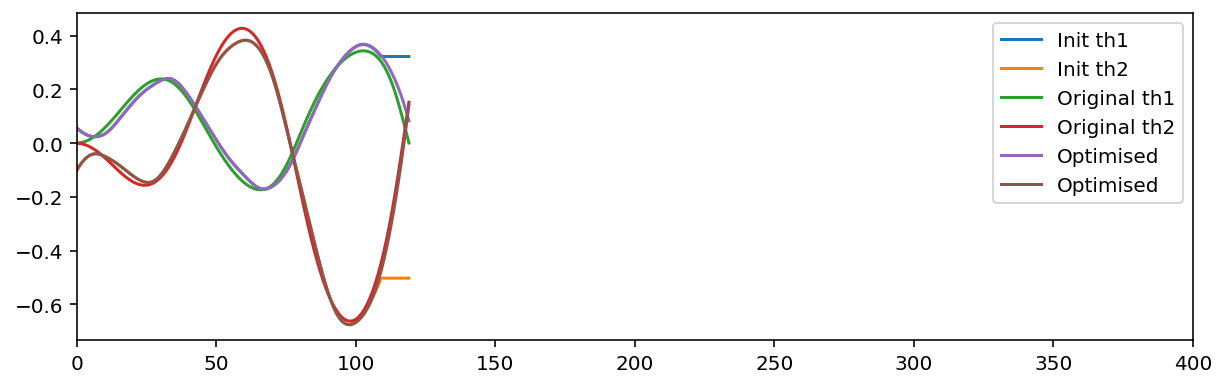

Solving for range: 130
ok
optimal


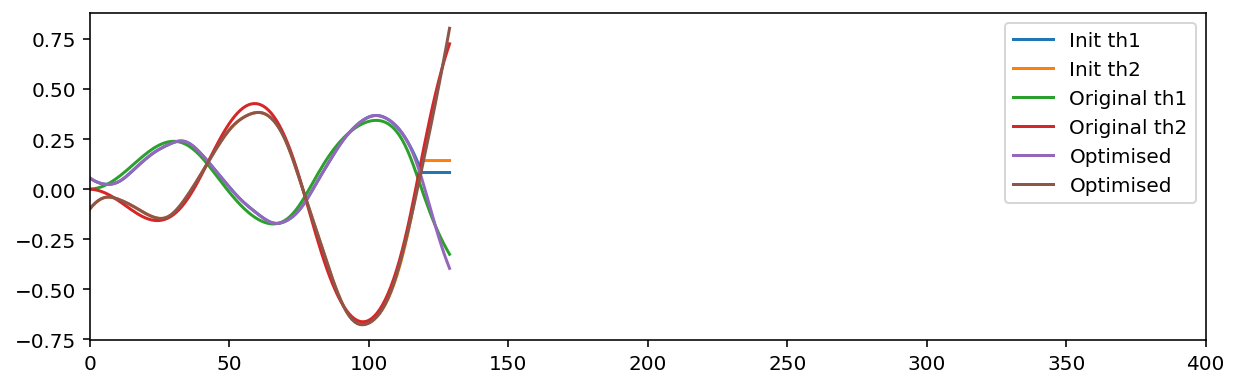

Solving for range: 140
ok
optimal


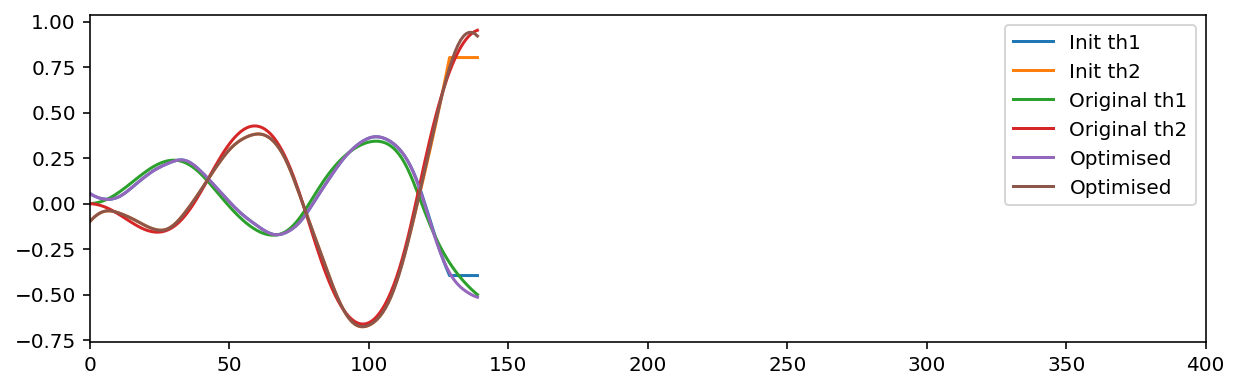

Solving for range: 150
ok
optimal


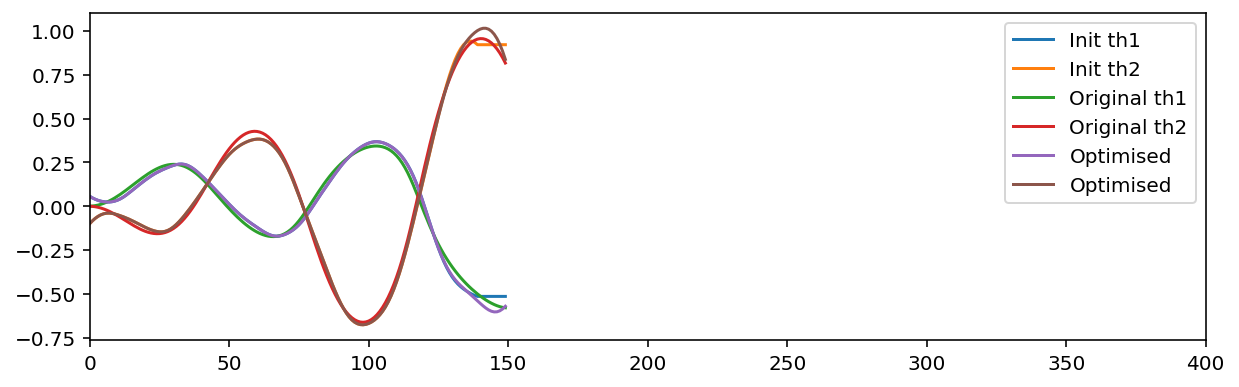

Solving for range: 160
ok
optimal


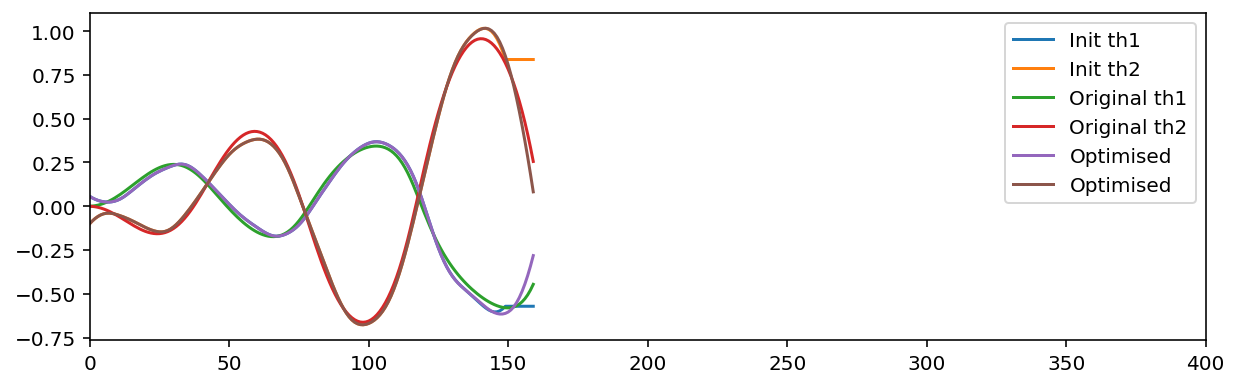

Solving for range: 170
ok
optimal


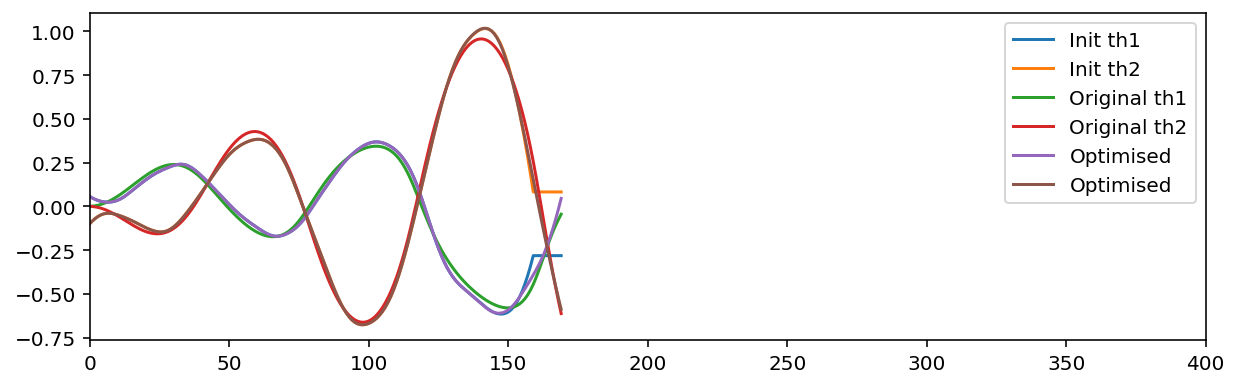

Solving for range: 180
ok
optimal


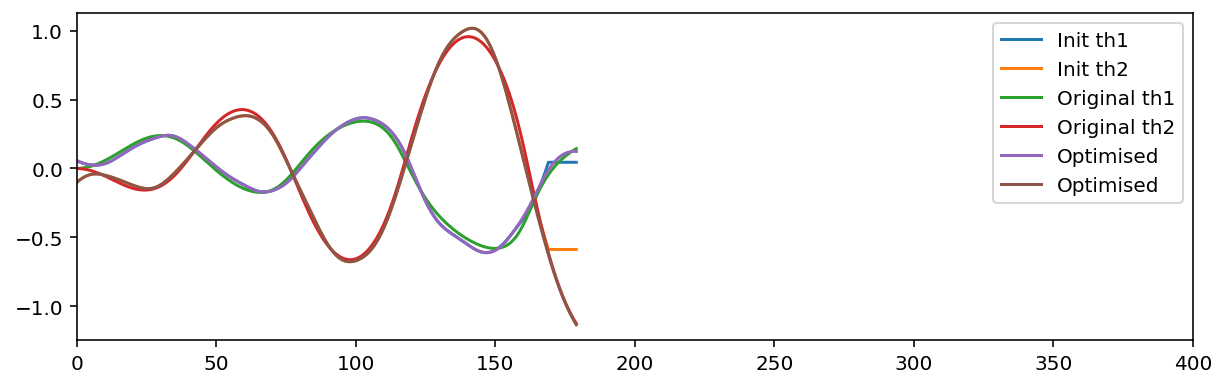

Solving for range: 190
ok
optimal


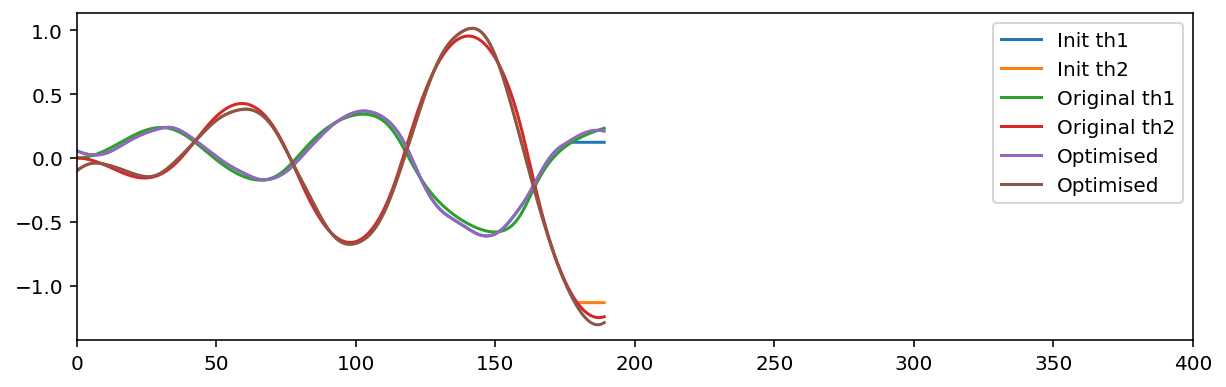

Solving for range: 200
ok
optimal


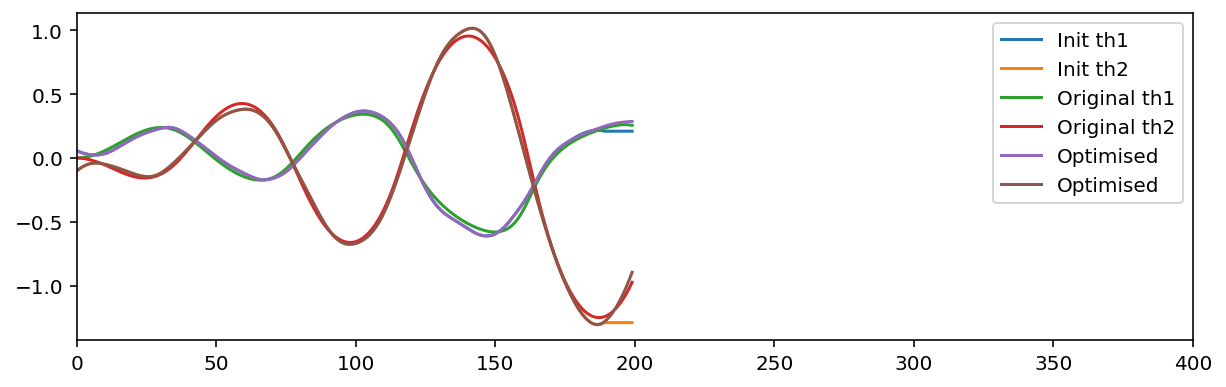

Solving for range: 210
ok
optimal


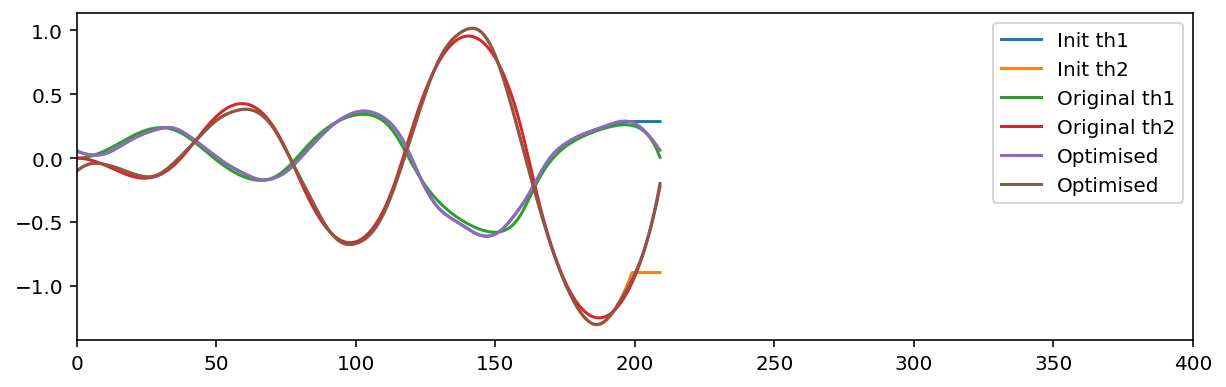

Solving for range: 220
ok
optimal


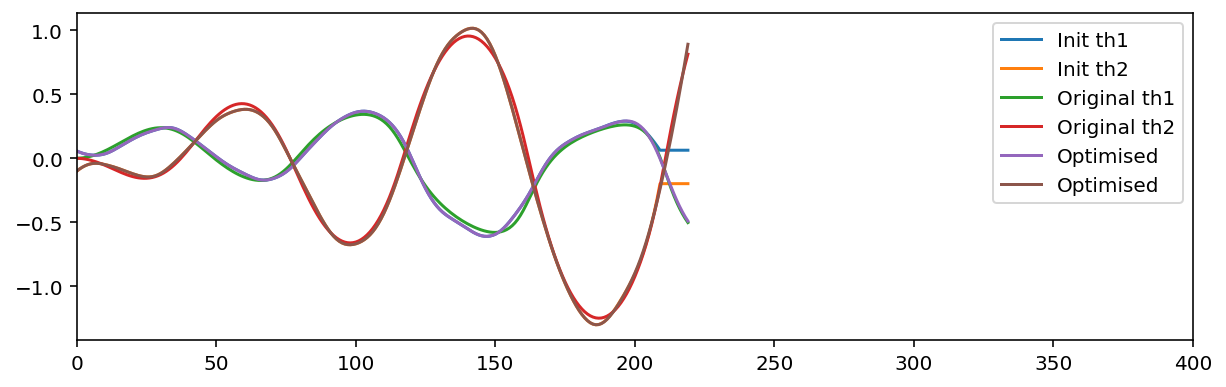

Solving for range: 230
ok
optimal


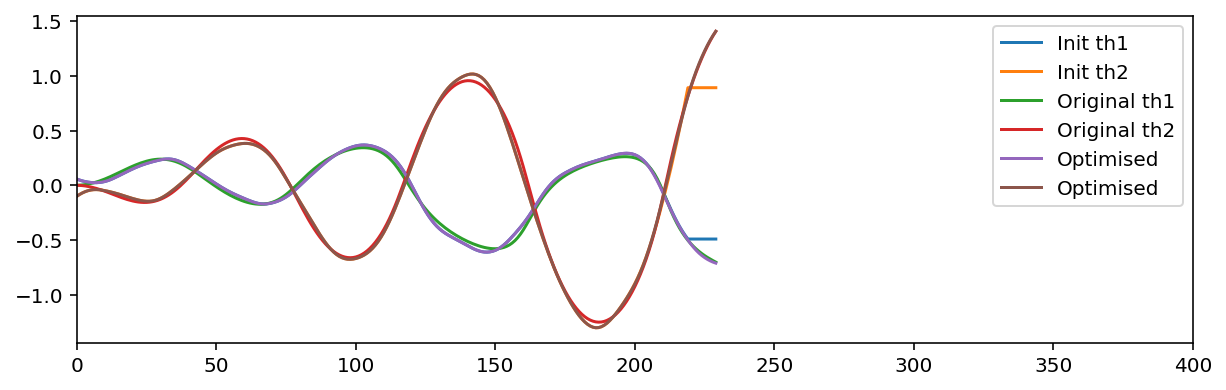

Solving for range: 240
ok
optimal


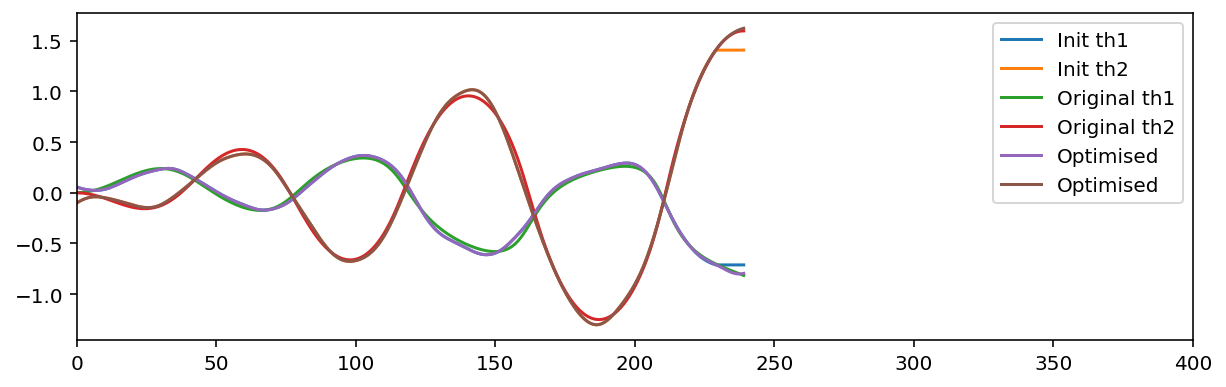

Solving for range: 250
ok
optimal


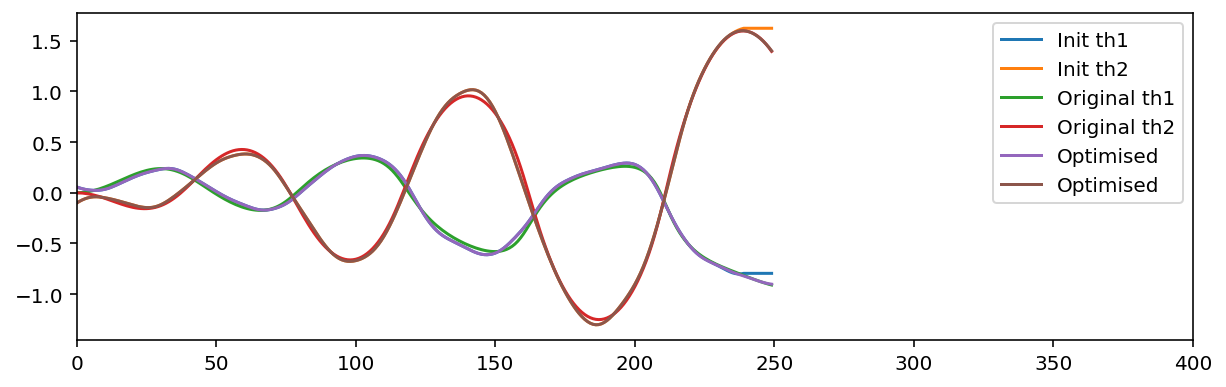

Solving for range: 260
ok
optimal


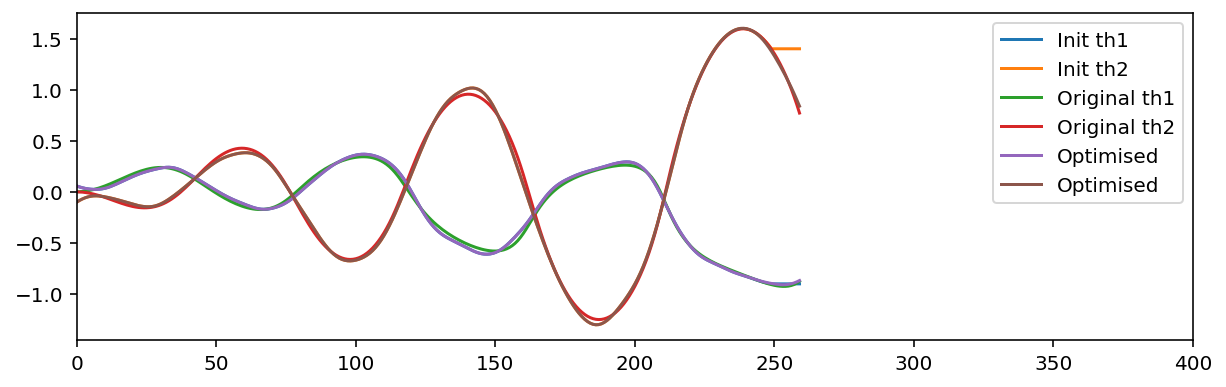

Solving for range: 270
ok
optimal


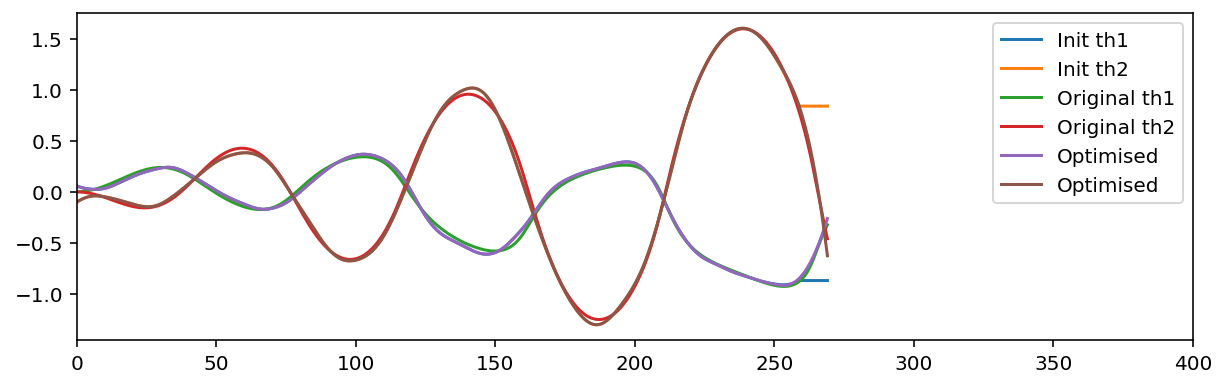

Solving for range: 280
ok
optimal


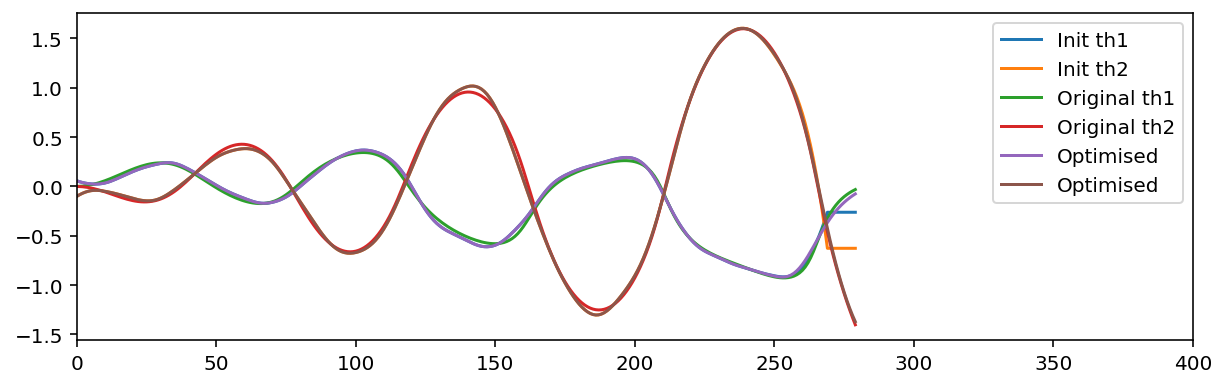

Solving for range: 290
ok
optimal


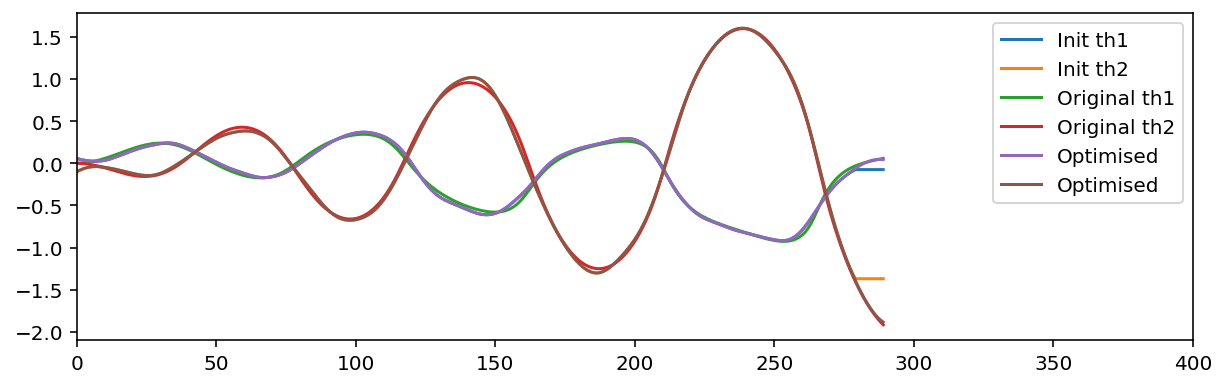

Solving for range: 300
ok
optimal


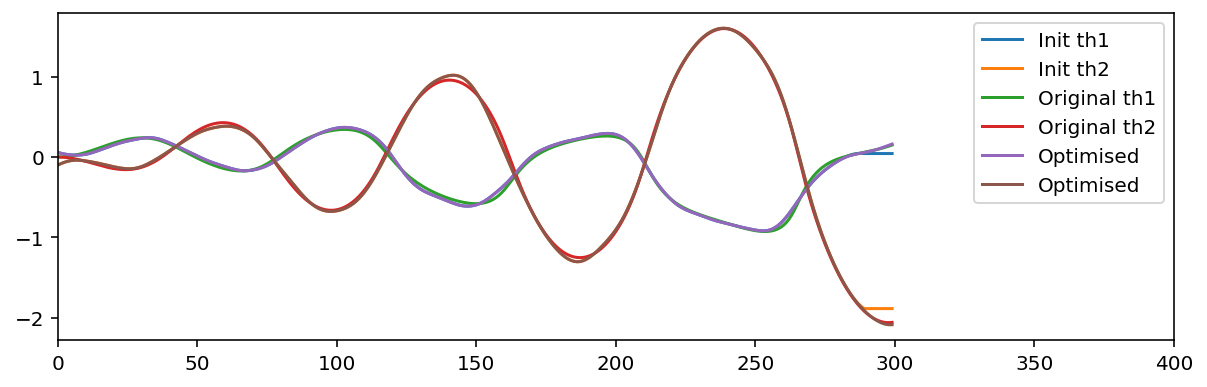

Solving for range: 310
ok
optimal


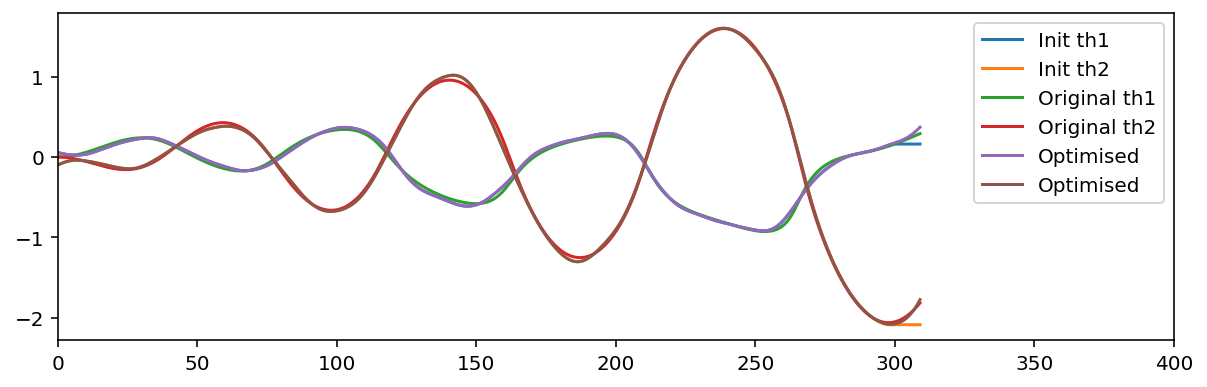

Solving for range: 320
ok
optimal


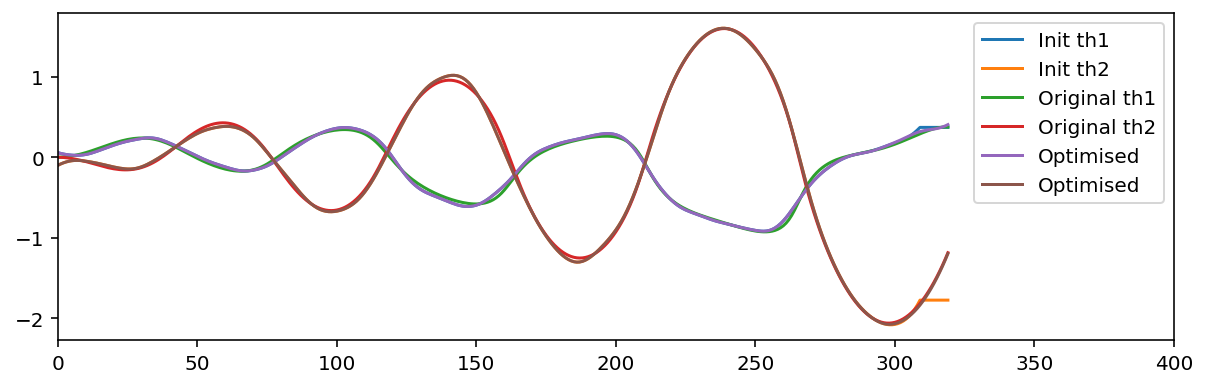

Solving for range: 330
ok
optimal


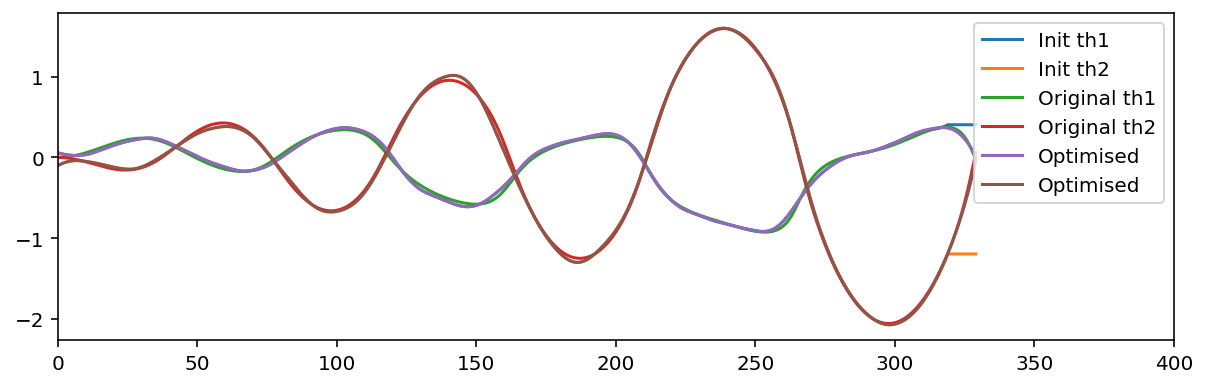

Solving for range: 340
ok
optimal


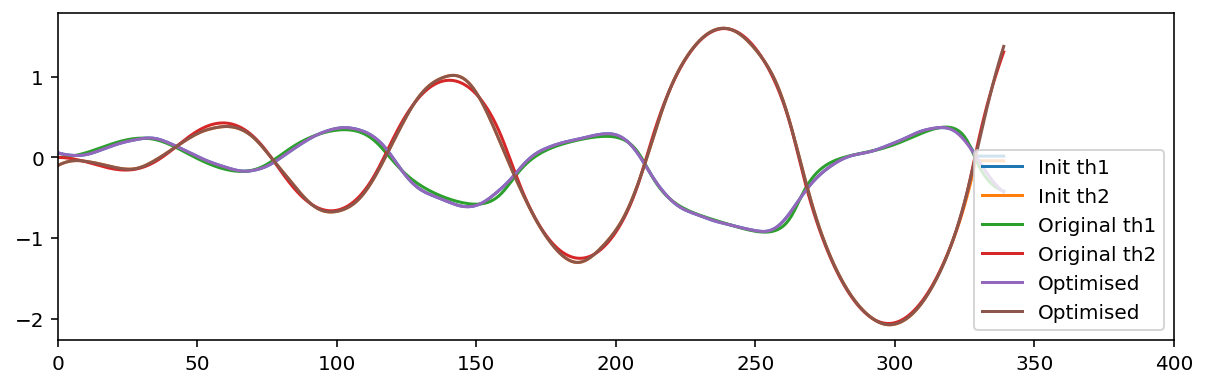

Solving for range: 350
ok
optimal


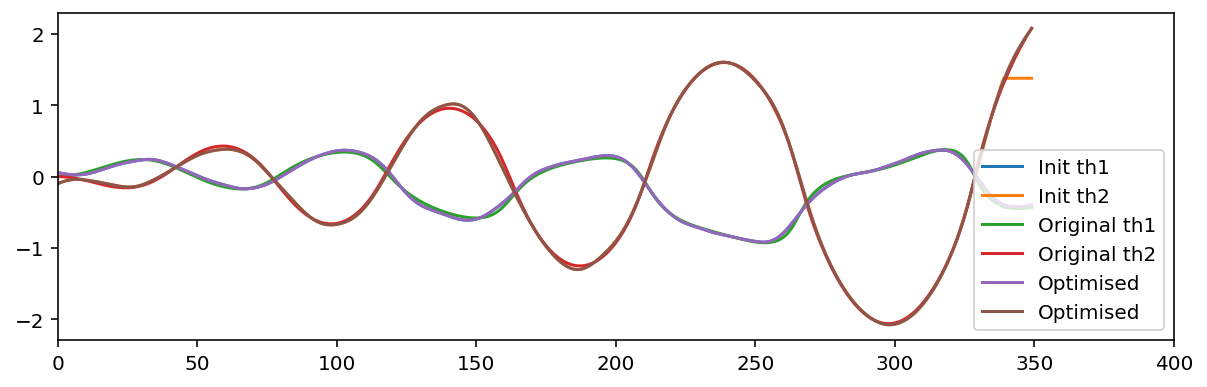

Solving for range: 360
ok
optimal


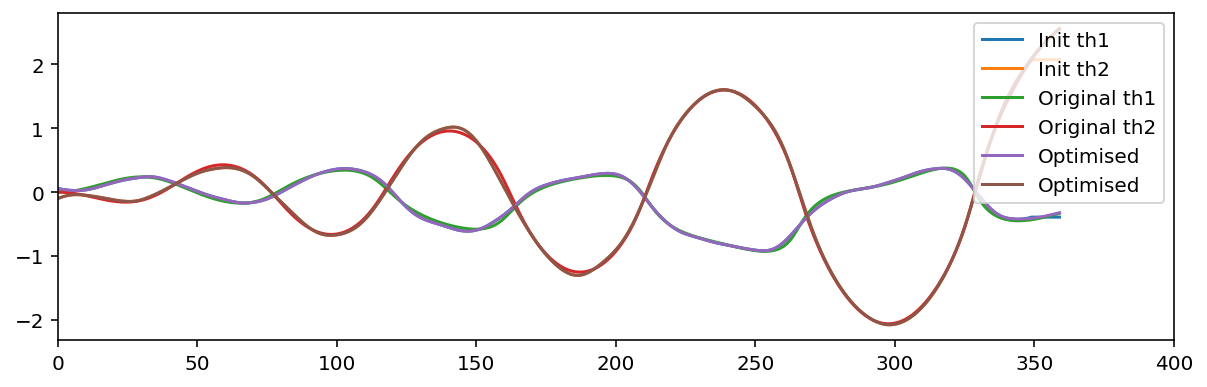

Solving for range: 370
ok
optimal


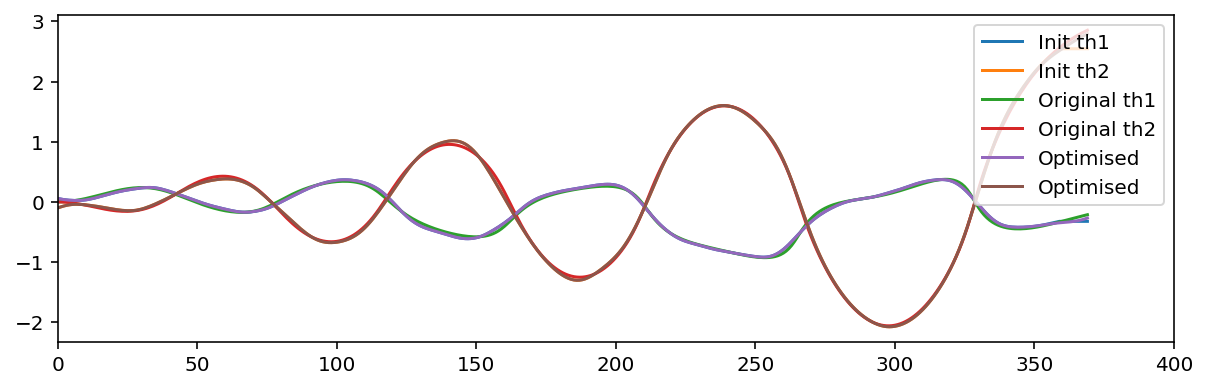

Solving for range: 380
ok
optimal


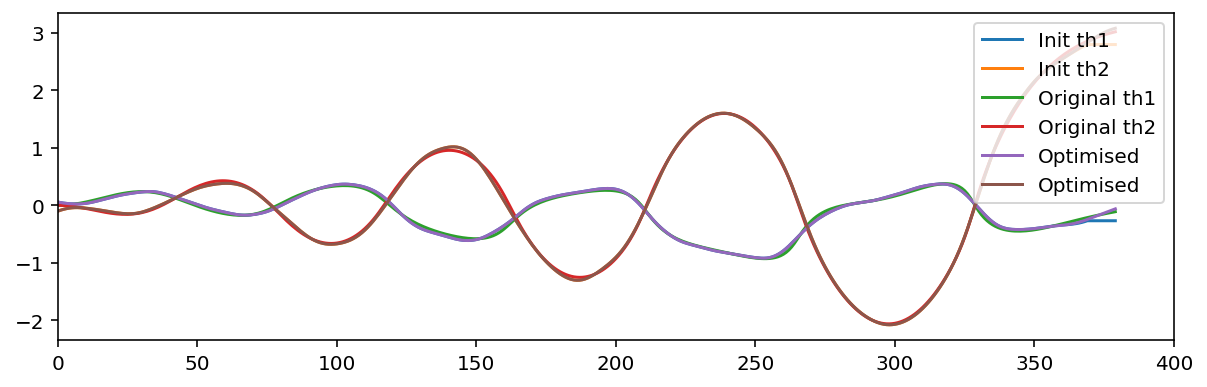

Solving for range: 390
ok
optimal


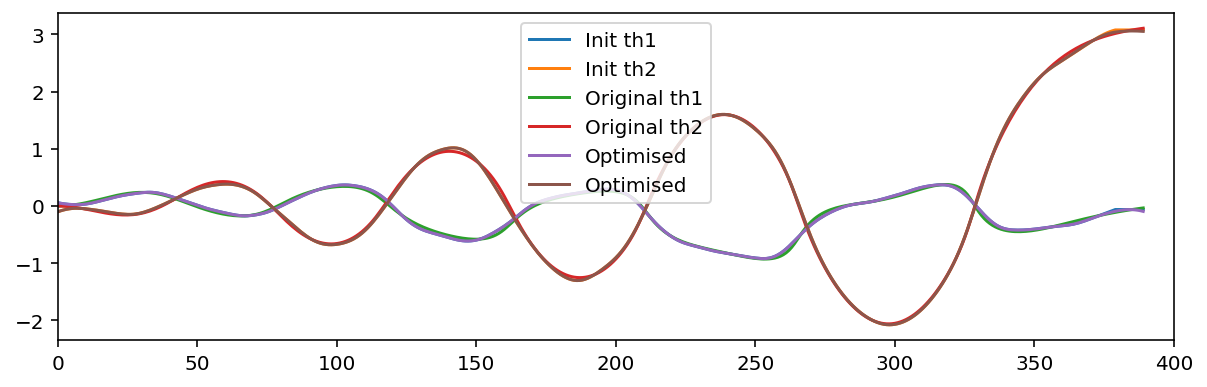

Solving for range: 400
ok
optimal


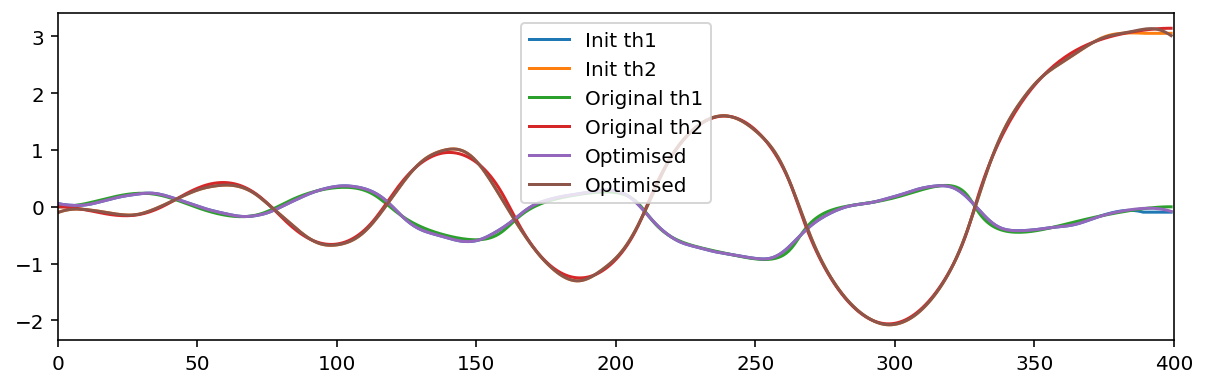

In [12]:
step = 10
prev_th = np.zeros((step, 2))
prev_dth = np.zeros((step, 2))
prev_ddth = np.zeros((step, 2))
prev_stepN = 0
# INCREMENTAL LOOP
for stepN in range(step, N+1, step):
    m = ConcreteModel(name = "Pendulum from measurements")

    # SETS
    m.N = RangeSet(stepN) #number of points in trajectory
    m.L = RangeSet(L) #number of links/markers
    m.C = RangeSet(C) #number of cameras
    m.D = RangeSet(2) #2D
    m.CP = RangeSet(16) #number of camera parameters (fx, fy, cx, cy, r11, r12, r13, r21, r22, r23, r31, r32, r33, t1, t2, t3)

    # PARAMETERS
    m.g = Param(initialize=9.81) #gravity
    m.h = Param(initialize=0.02) #timestep
    m.m = Param(m.L, initialize=1.0) #mass of links
    m.len = Param(m.L, initialize = 1.0) #length of links

    def init_camera_params(m, c, cp):
        fx, fy, cx, cy = K_arr[c-1,0,0], K_arr[c-1,1,1], K_arr[c-1,0,2], K_arr[c-1,1,2]
        r = R_arr[c-1].flatten()
        t = t_arr[c-1].flatten()
        params = [fx, fy, cx, cy, *r, *t]
        return params[cp-1]
    m.cp = Param(m.C, m.CP, initialize=init_camera_params) #camera parameters

    def init_measurements(m,c,l,n,d):
#         return pts_arr[c-1, l-1, n-1, d-1]
        return pts_arr_noise[c-1, l-1, n-1, d-1]

    m.meas = Param(m.C, m.L, m.N, m.D, initialize=init_measurements)

    # WEIGHTS
    m.meas_err_weight = Param(m.N, m.L, initialize=1e1)
    m.model_err_weight = Param(initialize=1e2)


    # VARIABLES
    m.th = Var(m.N, m.L, within=Reals) #position
    m.dth = Var(m.N, m.L, within=Reals) #velocity
    m.ddth = Var(m.N, m.L, within=Reals) #acceleration
    m.slack_model = Var(m.N, m.L)
    m.slack_meas = Var(m.C, m.L, m.N, m.D)


    # INTEGRATION CONSTRAINTS
    def backwards_euler_pos(m,n,l): # for positions
        if n > 1:
            return m.th[n,l] == m.th[n-1,l] + m.h*m.dth[n,l]
        else:
            return Constraint.Skip #use this to leave out members of a set that the constraint doesn't apply to (i.e. the first point)
    m.integrate_p = Constraint(m.N, m.L, rule = backwards_euler_pos)

    def backwards_euler_vel(m,n,l): # for velocities
        if n > 1:
            return m.dth[n,l] == m.dth[n-1,l] + m.h*m.ddth[n,l]
        else:
            return Constraint.Skip 
    m.integrate_v = Constraint(m.N, m.L, rule = backwards_euler_vel)


    # MODEL CONSTRAINTS
    #Constant acceleration model
    def constant_acc(m, n, l):
        if n > 1:
            return m.ddth[n,l] == m.ddth[n-1,l] + m.slack_model[n,l]
        else:
            return Constraint.Skip 
    m.constant_acc = Constraint(m.N, m.L, rule = constant_acc)

    
    # MEASUREMENT CONSTRAINTS
    func_map = {'sin':sin, 'cos':cos} 
    sym_list_meas = [psi1, phi2, l1, l2]
    lamb_x1 = sp.lambdify(sym_list_meas, x1, modules=[func_map])
    lamb_y1 = sp.lambdify(sym_list_meas, y1, modules=[func_map])
    lamb_z1 = sp.lambdify(sym_list_meas, z1, modules=[func_map])
    lamb_x2 = sp.lambdify(sym_list_meas, x2, modules=[func_map])
    lamb_y2 = sp.lambdify(sym_list_meas, y2, modules=[func_map])
    lamb_z2 = sp.lambdify(sym_list_meas, z2, modules=[func_map])
    lambs = [
        [lamb_x1, lamb_y1, lamb_z1],
        [lamb_x2, lamb_y2, lamb_z2],
    ]

    def con_meas(m, c, l, n, d):
        #get 3d points
        var_list = [m.th[n,1], m.th[n,2], m.len[1], m.len[2]]
        x = lambs[l-1][0](*var_list)
        y = lambs[l-1][1](*var_list)
        z = lambs[l-1][2](*var_list)
        #project
        z_2d = x*m.cp[c,11] + y*m.cp[c,12] + z*m.cp[c,13] + m.cp[c,16]
        if d==1:
            x_2d = x*m.cp[c,5] + y*m.cp[c,6] + z*m.cp[c,7] + m.cp[c,14]
            u = m.cp[c,1]*x_2d/z_2d + m.cp[c,3]
            return u - m.meas[c,l,n,1] - m.slack_meas[c, l, n, 1] == 0
        else:
            y_2d = x*m.cp[c,8] + y*m.cp[c,9] + z*m.cp[c,10] + m.cp[c,15]
            v = m.cp[c,2]*y_2d/z_2d + m.cp[c,4]
            return v - m.meas[c,l,n,2] - m.slack_meas[c, l, n, 2] == 0
    m.con_meas = Constraint(m.C, m.L, m.N, m.D, rule = con_meas)


    #OBJECTIVE FUNCTION
    def obj(m):
        slack_model_err = 0.0
        slack_meas_err = 0.0
        for n in range(1, stepN+1):
            for l in range(1, L+1):
                slack_model_err += m.model_err_weight * m.slack_model[n, l] ** 2
                for c in range (1, C+1):
                    for d in range(1, 3):
                        slack_meas_err += m.meas_err_weight[n, l]*redescending_loss(m.slack_meas[c,l,n,d], redesc_a, redesc_b, redesc_c)
        return (slack_meas_err + slack_model_err)
    m.obj = Objective(rule = obj)

    # INITIALIZATION
    for n in range(1,stepN+1):
        for l in range(1,3):
            if n<len(prev_th): #init using known values
                m.th[n,l].value = prev_th[n-1,l-1]
                m.dth[n,l].value = prev_dth[n-1,l-1]
                m.ddth[n,l].value = prev_ddth[n-1,l-1]
            else: #init using last known value
                m.th[n,l].value = prev_th[-1,l-1]
                m.dth[n,l].value = prev_dth[-1,l-1]
                m.ddth[n,l].value = prev_ddth[-1,l-1]
    plt.figure(figsize=(10,3))
    ax = plt.subplot()
    ax.set_xlim((0,400))
    ax.plot([value(m.th[(n, 1)]) for n in range(1, stepN+1)], label="Init th1")
    ax.plot([value(m.th[(n, 2)]) for n in range(1, stepN+1)], label="Init th2")
    ax.plot(th1_orig[:stepN], label="Original th1")
    ax.plot(th2_orig[:stepN], label="Original th2")
    
    
    
    
    # RUN THE SOLVER
    opt = SolverFactory('ipopt')

    # solver options
    opt.options["print_level"] = 5
    opt.options["max_iter"] = 10000
    opt.options["max_cpu_time"] = 300
    opt.options["tol"] = 1e-12
    opt.options["OF_print_frequency_iter"] = 25
    results = opt.solve(m, tee = False)
    ## For debugging:
    print("Solving for range:", stepN)
    print(results.solver.status)
    print(results.solver.termination_condition)
    if results.solver.status.key != "ok":
        break
    
    # UPDATE PREVIOUS RESULTS
    prev_th = np.empty((stepN, 2))
    prev_dth = np.empty((stepN, 2))
    prev_ddth = np.empty((stepN, 2))
    for n in range(1,stepN+1):
        for l in range(1,3):
            prev_th[n-1,l-1] = value(m.th[n,l])
            prev_dth[n-1,l-1] = value(m.dth[n,l])
            prev_ddth[n-1,l-1] = value(m.ddth[n,l])
    ax.plot(prev_th, label="Optimised")
    plt.legend()
    plt.show()

In [13]:
# GET ALL THE DATA FOR PLOTTING
# --- Original, measured and estimated ---
# Original - underlying initial signal
# Measured - underlying signal with added noise
# Estimated - what we estimate to be the underlying original signal

def pt3d_to_x2d(x, y, z, K, R, t):
    z_2d_pt = x*R[2,0] + y*R[2,1] + z*R[2,2] + t.flatten()[2]
    x_2d_pt = x*R[0,0] + y*R[0,1] + z*R[0,2] + t.flatten()[0]
    u = K[0,0]*x_2d_pt/z_2d_pt + K[0,2]
    return u

def pt3d_to_y2d(x, y, z, K, R, t):
    z_2d_pt = x*R[2,0] + y*R[2,1] + z*R[2,2] + t.flatten()[2]
    y_2d_pt = x*R[1,0] + y*R[1,1] + z*R[1,2] + t.flatten()[0]
    v = K[1,1]*y_2d_pt/z_2d_pt + K[1,2]
    return v

# ORIGINAL
# 1. States
with open("states_3d.pickle", "rb") as f:
    [th1_orig, th2_orig, dth1_orig, dth2_orig, ddth1_orig, ddth2_orig, _] = pickle.load(f)
# 2. 3D positions
x1_3d_orig = [lamb_x1(th1, th2, l1_val, l2_val) for (th1, th2) in zip(th1_orig, th2_orig)]
y1_3d_orig = [lamb_y1(th1, th2, l1_val, l2_val) for (th1, th2) in zip(th1_orig, th2_orig)]
z1_3d_orig = [lamb_z1(th1, th2, l1_val, l2_val) for (th1, th2) in zip(th1_orig, th2_orig)]
x2_3d_orig = [lamb_x2(th1, th2, l1_val, l2_val) for (th1, th2) in zip(th1_orig, th2_orig)]
y2_3d_orig = [lamb_y2(th1, th2, l1_val, l2_val) for (th1, th2) in zip(th1_orig, th2_orig)]
z2_3d_orig = [lamb_z2(th1, th2, l1_val, l2_val) for (th1, th2) in zip(th1_orig, th2_orig)]
# 3. Camera points
x1_cam_orig_arr, y1_cam_orig_arr, x2_cam_orig_arr, y2_cam_orig_arr = [], [], [], []
for c in range(C):
    x1_cam_orig_arr.append(pts_arr[c, 0, :, 0])
    y1_cam_orig_arr.append(pts_arr[c, 0, :, 1])
    x2_cam_orig_arr.append(pts_arr[c, 1, :, 0])
    y2_cam_orig_arr.append(pts_arr[c, 1, :, 1])


# MEASURED
x1_cam_meas_arr, y1_cam_meas_arr, x2_cam_meas_arr, y2_cam_meas_arr = [], [], [], []
for c in range(C):
    x1_cam_meas_arr.append(pts_arr_noise[c, 0, :, 0])
    y1_cam_meas_arr.append(pts_arr_noise[c, 0, :, 1])
    x2_cam_meas_arr.append(pts_arr_noise[c, 1, :, 0])
    y2_cam_meas_arr.append(pts_arr_noise[c, 1, :, 1])
    

# ESTIMATED
th1_est = [value(m.th[(n, 1)]) for n in range(1, N+1)]
th2_est = [value(m.th[(n, 2)]) for n in range(1, N+1)]
dth1_est = [value(m.dth[(n, 1)]) for n in range(1, N+1)]
dth2_est = [value(m.dth[(n, 2)]) for n in range(1, N+1)]
ddth1_est = [value(m.ddth[(n, 1)]) for n in range(1, N+1)]
ddth2_est = [value(m.ddth[(n, 2)]) for n in range(1, N+1)]

x1_3d_est = [lamb_x1(th1, th2, l1_val, l2_val) for (th1, th2) in zip(th1_est, th2_est)]
y1_3d_est = [lamb_y1(th1, th2, l1_val, l2_val) for (th1, th2) in zip(th1_est, th2_est)]
z1_3d_est = [lamb_z1(th1, th2, l1_val, l2_val) for (th1, th2) in zip(th1_est, th2_est)]
x2_3d_est = [lamb_x2(th1, th2, l1_val, l2_val) for (th1, th2) in zip(th1_est, th2_est)]
y2_3d_est = [lamb_y2(th1, th2, l1_val, l2_val) for (th1, th2) in zip(th1_est, th2_est)]
z2_3d_est = [lamb_z2(th1, th2, l1_val, l2_val) for (th1, th2) in zip(th1_est, th2_est)]

x1_cam_est_arr, y1_cam_est_arr, x2_cam_est_arr, y2_cam_est_arr = [], [], [], []
for K, R, t in zip(K_arr, R_arr, t_arr):
    x1_cam_est_arr.append([pt3d_to_x2d(x,y,z,K,R,t) for x,y,z in zip(x1_3d_est, y1_3d_est, z1_3d_est)])
    y1_cam_est_arr.append([pt3d_to_y2d(x,y,z,K,R,t) for x,y,z in zip(x1_3d_est, y1_3d_est, z1_3d_est)])
    x2_cam_est_arr.append([pt3d_to_x2d(x,y,z,K,R,t) for x,y,z in zip(x2_3d_est, y2_3d_est, z2_3d_est)])
    y2_cam_est_arr.append([pt3d_to_y2d(x,y,z,K,R,t) for x,y,z in zip(x2_3d_est, y2_3d_est, z2_3d_est)])

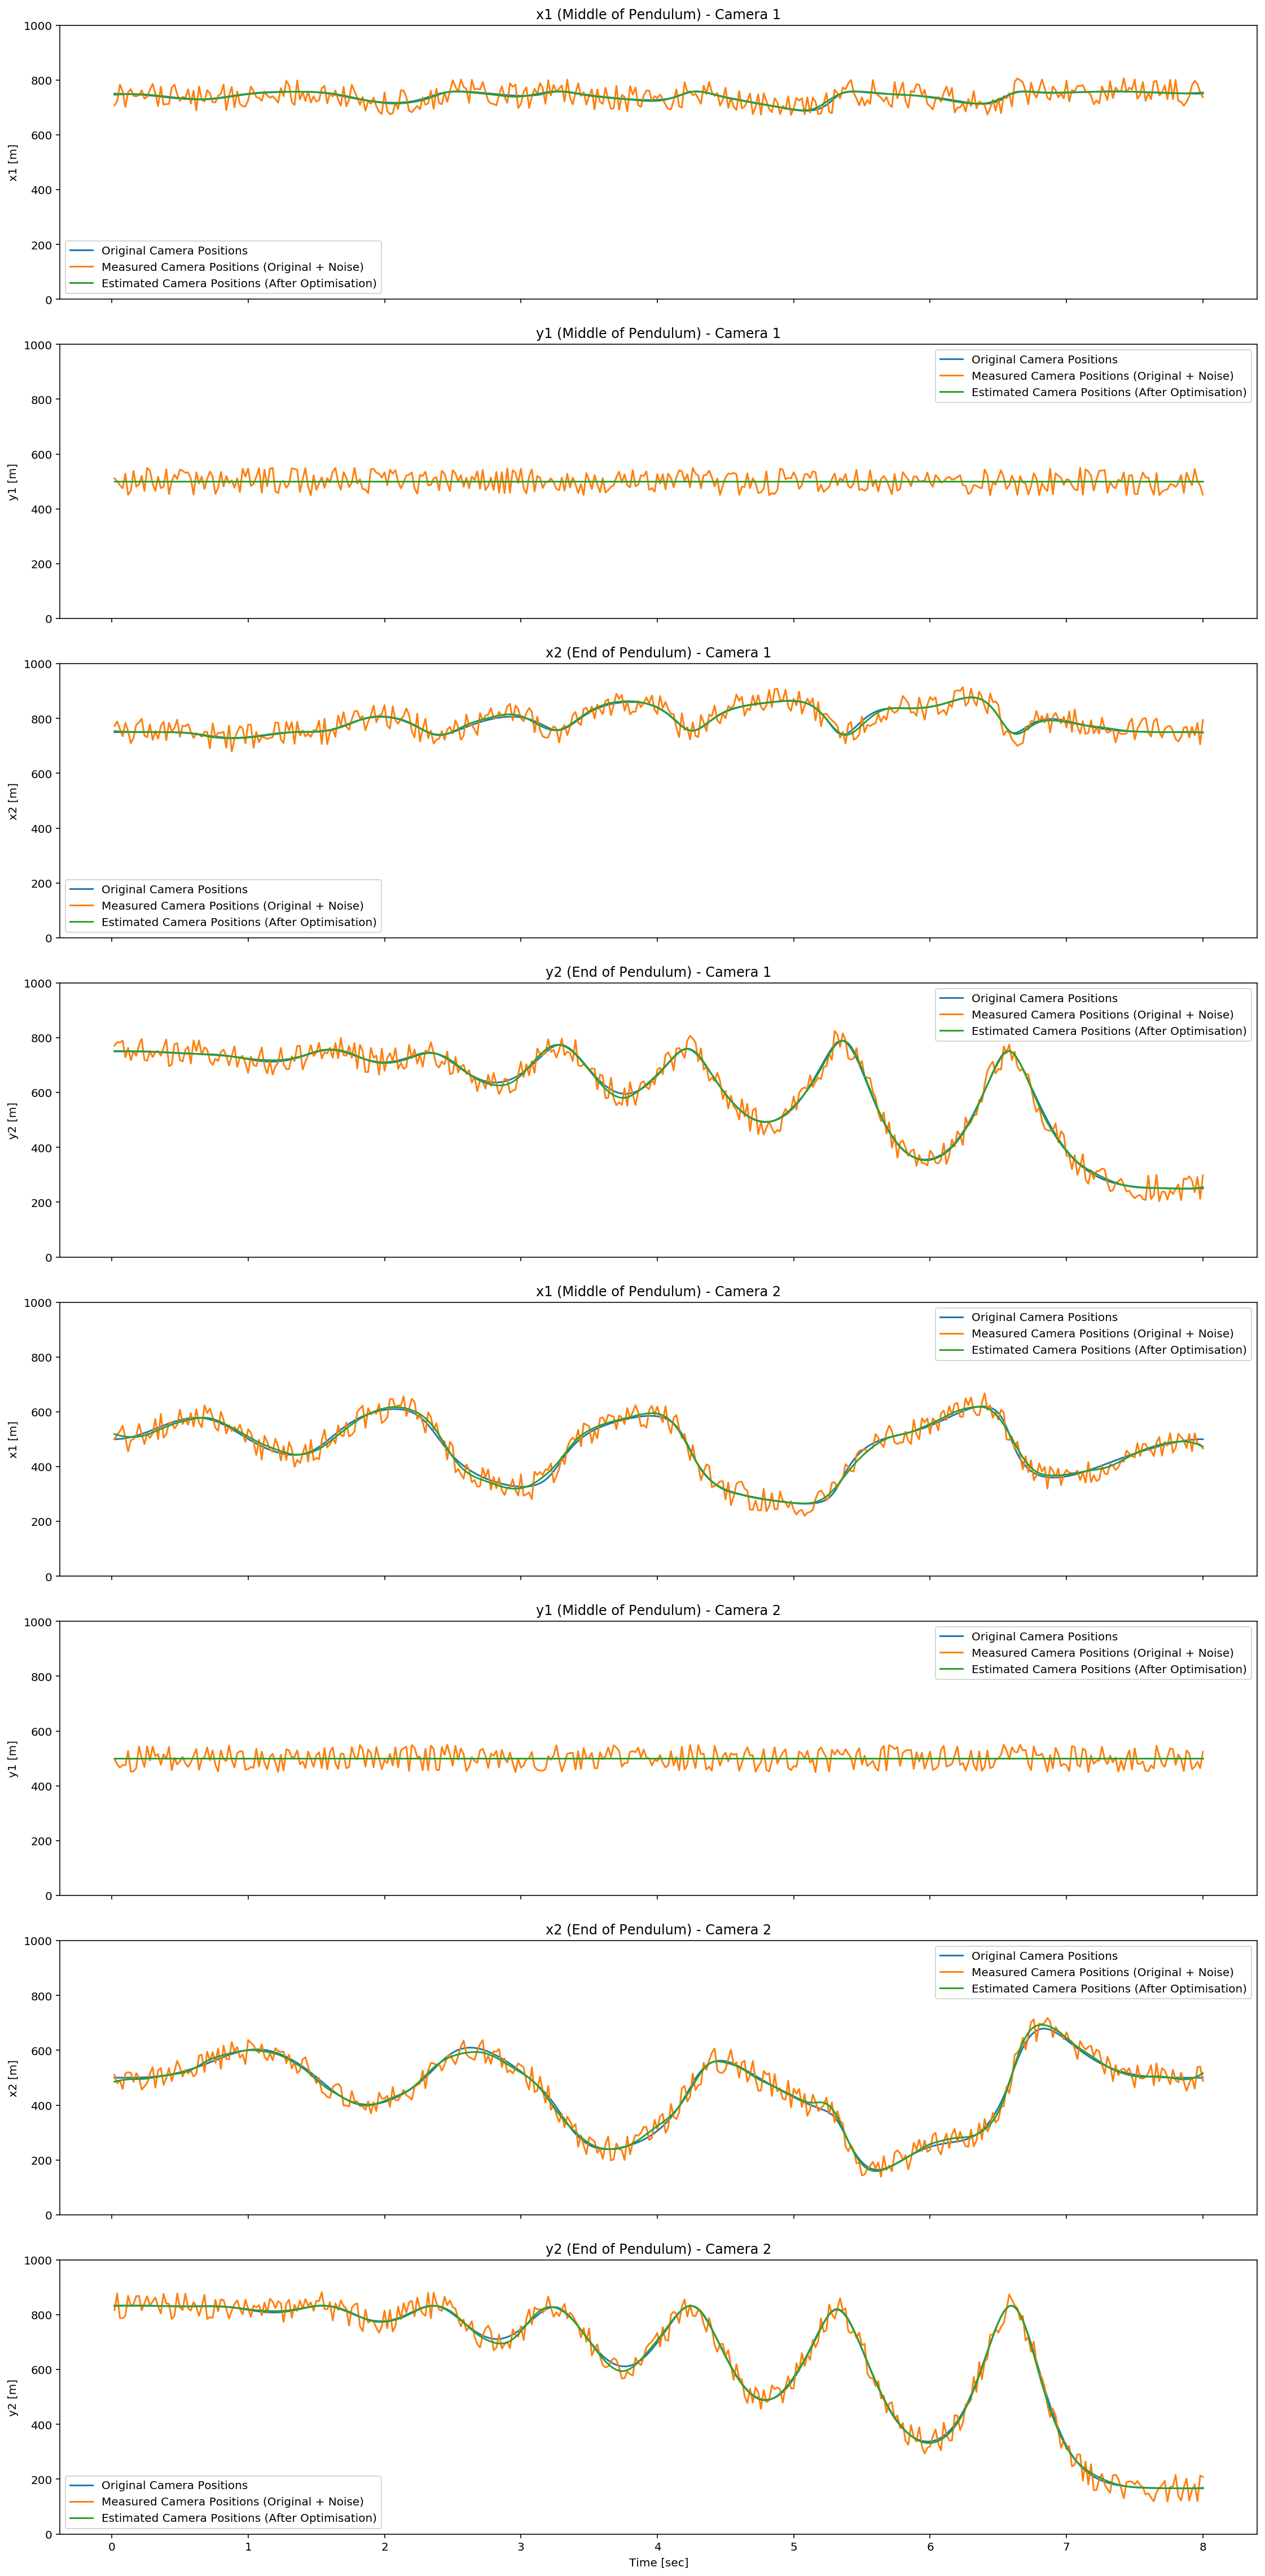

In [14]:
plt.close('all')
# PLOT 2D CAMERA INFO
fig, axs = plt.subplots(4*C,1, figsize=(16, 32), sharex=True) #create axes
fig.tight_layout(pad=3.0)
time = [i*h for i in range(1, N+1)]
plt.xlabel('Time [sec]')
for c in range(C):
    axs[4*c].plot(time, x1_cam_orig_arr[c], label="Original Camera Positions")
    axs[4*c].plot(time, x1_cam_meas_arr[c], label="Measured Camera Positions (Original + Noise)")
    axs[4*c].plot(time, x1_cam_est_arr[c], label="Estimated Camera Positions (After Optimisation)")
    axs[4*c].set_ylim((0,1000))
    axs[4*c].set_ylabel("x1 [m]")
    axs[4*c].set_title(f"x1 (Middle of Pendulum) - Camera {c+1}")
    axs[4*c].legend()
    

    axs[4*c+1].plot(time, y1_cam_orig_arr[c], label="Original Camera Positions")
    axs[4*c+1].plot(time, y1_cam_meas_arr[c], label="Measured Camera Positions (Original + Noise)")
    axs[4*c+1].plot(time, y1_cam_est_arr[c], label="Estimated Camera Positions (After Optimisation)")
    axs[4*c+1].set_ylim((0,1000))
    axs[4*c+1].set_ylabel("y1 [m]")
    axs[4*c+1].set_title(f"y1 (Middle of Pendulum) - Camera {c+1}")
    axs[4*c+1].legend()
    
    axs[4*c+2].plot(time, x2_cam_orig_arr[c], label=f"Original Camera Positions")
    axs[4*c+2].plot(time, x2_cam_meas_arr[c], label=f"Measured Camera Positions (Original + Noise)")
    axs[4*c+2].plot(time, x2_cam_est_arr[c], label=f"Estimated Camera Positions (After Optimisation)")
    axs[4*c+2].set_ylim((0,1000))
    axs[4*c+2].set_ylabel("x2 [m]")
    axs[4*c+2].set_title(f"x2 (End of Pendulum) - Camera {c+1}")
    axs[4*c+2].legend()
    
    axs[4*c+3].plot(time, y2_cam_orig_arr[c], label=f"Original Camera Positions")
    axs[4*c+3].plot(time, y2_cam_meas_arr[c], label=f"Measured Camera Positions (Original + Noise)")
    axs[4*c+3].plot(time, y2_cam_est_arr[c], label=f"Estimated Camera Positions (After Optimisation)")
    axs[4*c+3].set_ylim((0,1000))
    axs[4*c+3].set_ylabel("y2 [m]")
    axs[4*c+3].set_title(f"y2 (End of Pendulum) - Camera {c+1}")
    axs[4*c+3].legend()


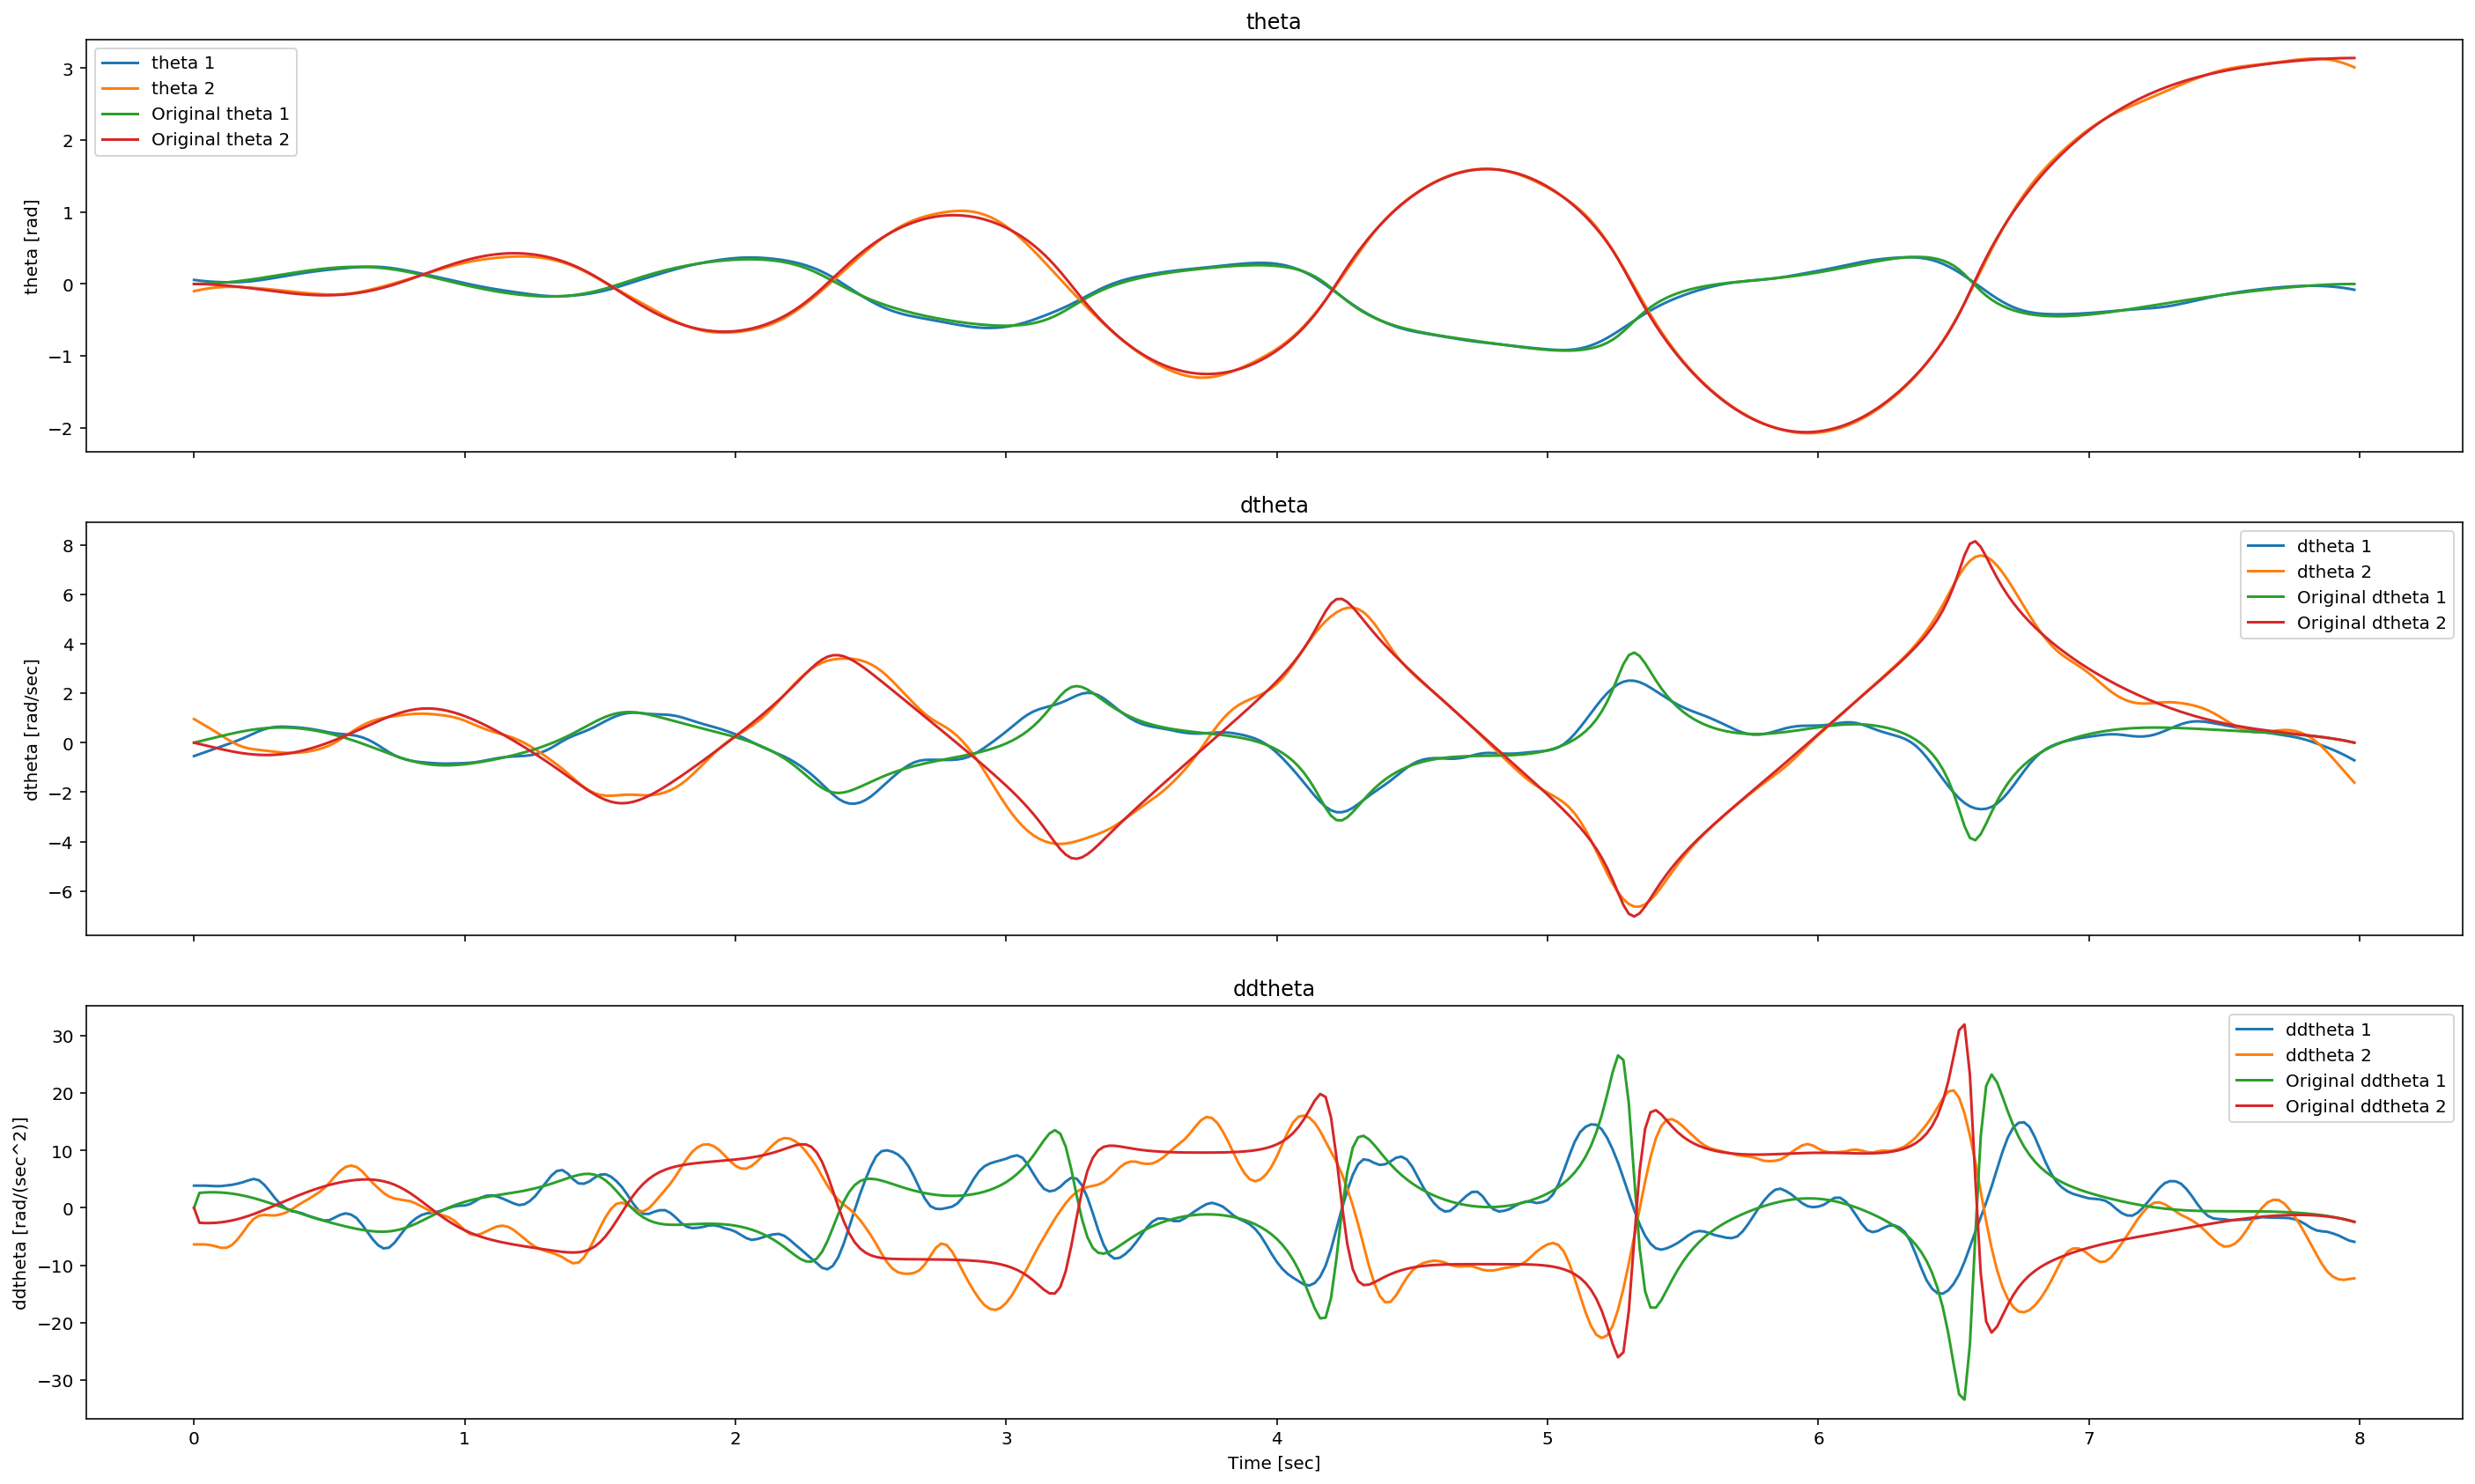

In [15]:
# PLOT STATES
fig, [ax1, ax2, ax3] = plt.subplots(3,1, figsize=(20, 12), sharex=True) #create axes
fig.tight_layout(pad=3.0)
time = [i*h for i in range(N)]
plt.xlabel('Time [sec]')

#Pos
for i in range(1,3):
    theta = [m.th[(j, i)].value for j in range(1, N+1)]
    ax1.plot(time, theta, label=f"theta {i}")
ax1.plot(time, th1_orig, label="Original theta 1")
ax1.plot(time, th2_orig, label="Original theta 2")
ax1.set_ylabel('theta [rad]')
ax1.set_title('theta')
ax1.legend()

#Vel
for i in range(1,3):
    dtheta = [m.dth[(j, i)].value for j in range(1, N+1)]
    ax2.plot(time, dtheta, label=f"dtheta {i}")
ax2.plot(time, dth1_orig, label="Original dtheta 1")
ax2.plot(time, dth2_orig, label="Original dtheta 2")
ax2.set_ylabel('dtheta [rad/sec]')
ax2.set_title('dtheta')
ax2.legend()

#Acc    
for i in range(1,3):
    ddtheta = [m.ddth[(j, i)].value for j in range(1, N+1)]
    ax3.plot(time, ddtheta, label=f"ddtheta {i}")
ax3.plot(time, ddth1_orig, label="Original ddtheta 1")
ax3.plot(time, ddth2_orig, label="Original ddtheta 2")
ax3.set_ylabel('ddtheta [rad/(sec^2)]')
ax3.set_title('ddtheta')
ax3.legend()

In [16]:
%matplotlib inline
plt.close('all')

#animate it
fig1 = plt.figure(figsize=(10,10))
ax1 = plt.gca(projection='3d')

def plot_pendulum(i, m, ax):
    ax.clear()
    ax.set_xlim((-3, 3))
    ax.set_ylim((-3, 3))
    ax.set_zlim((-3, 3))
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    
    psi1_val = m.th[i, 1].value
    phi2_val = m.th[i, 2].value
    l1_val = m.len[1]
    l2_val = m.len[2]
    
    x = [0, lamb_x1(psi1_val, phi2_val, l1_val, l2_val), lamb_x2(psi1_val, phi2_val, l1_val, l2_val)]
    y = [0, lamb_y1(psi1_val, phi2_val, l1_val, l2_val), lamb_y2(psi1_val, phi2_val, l1_val, l2_val)]
    z = [0, lamb_z1(psi1_val, phi2_val, l1_val, l2_val), lamb_z2(psi1_val, phi2_val, l1_val, l2_val)]

    plot_camera_axis(ax, np.eye(3), np.array([[0,0,0]]).T)
    plot_camera_axis(ax, R_arr[0], t_arr[0])
    plot_camera_axis(ax, R_arr[1], t_arr[1])
    ax.plot(x,y,z, linewidth=3, zorder=2)
    ax.plot(x, y, z, '.k', markersize=20, zorder=3)

 
    
update = lambda i: plot_pendulum(i, m, ax1) #lambdify update function
animate = ani.FuncAnimation(fig1, update, range(1, N+1), interval = m.h*1000, repeat=True)
plt.close('all')
HTML(animate.to_html5_video()) #you need to convert the animation to HTML5 to embed it in the notebook

In [17]:
def plot(m, c, l, th1, th2):
    #get 3d points
    var_list = [th1, th2, m.len[1], m.len[2]]
    x = lambs[l-1][0](*var_list)
    y = lambs[l-1][1](*var_list)
    z = lambs[l-1][2](*var_list)
    #project
    z_2d = x*m.cp[c,11] + y*m.cp[c,12] + z*m.cp[c,13] + m.cp[c,16]
    
    x_2d = x*m.cp[c,5] + y*m.cp[c,6] + z*m.cp[c,7] + m.cp[c,14]
    u = m.cp[c,1]*x_2d/z_2d + m.cp[c,3]

    y_2d = x*m.cp[c,8] + y*m.cp[c,9] + z*m.cp[c,10] + m.cp[c,15]
    v = m.cp[c,2]*y_2d/z_2d + m.cp[c,4]
    return u,v


In [18]:
%matplotlib inline
plt.close('all')

#animate it
fig, axs = plt.subplots(1,2, figsize=(12, 6), sharex=True)
def plot_pendulum(i, m, ax):
    psi1_val = m.th[i, 1].value
    phi2_val = m.th[i, 2].value
    l1_val = m.len[1]
    l2_val = m.len[2]
    
    x = [0, lamb_x1(psi1_val, phi2_val, l1_val, l2_val), lamb_x2(psi1_val, phi2_val, l1_val, l2_val)]
    y = [0, lamb_y1(psi1_val, phi2_val, l1_val, l2_val), lamb_y2(psi1_val, phi2_val, l1_val, l2_val)]
    z = [0, lamb_z1(psi1_val, phi2_val, l1_val, l2_val), lamb_z2(psi1_val, phi2_val, l1_val, l2_val)]
    
    pts = np.vstack([x,y,z]).T.reshape((-1,3,1))
    
    for i, (k, r, t) in enumerate(zip(K_arr, R_arr, t_arr)):
        pts_2d = project(pts, k, r, t)
        axs[i].clear()
        axs[i].set_xlim((0, 1000))
        axs[i].set_ylim((1000, 0))
        axs[i].set_xlabel("X")
        axs[i].set_ylabel("Y")
        axs[i].plot(pts_2d[:,0],pts_2d[:,1], linewidth=3)
        axs[i].plot(pts_2d[:,0],pts_2d[:,1], '.k', markersize=20)
        
        #DEBUG
        xtest = [plot(m,i+1,1,psi1_val, phi2_val)[0], plot(m,i+1,2,psi1_val, phi2_val)[0]]
        ytest = [plot(m,i+1,1,psi1_val, phi2_val)[1], plot(m,i+1,2,psi1_val, phi2_val)[1]]
        axs[i].plot(xtest, ytest, c='r')
 
    
update = lambda i: plot_pendulum(i, m, ax1) #lambdify update function
animate = ani.FuncAnimation(fig, update, range(1, N+1), interval = m.h*1000, repeat=True)
plt.close('all')
HTML(animate.to_html5_video()) #you need to convert the animation to HTML5 to embed it in the notebook